<a href="https://clarusway.com/contact-us/"><img align="center" src="https://i.ibb.co/B43qn24/officially-licensed-logo.png" alt="Open in Clarusway LMS" width="110" height="200" title="This notebook is licensed by Clarusway IT training school. Please contact the authorized persons about the conditions under which you can use or share."></a>

In [1]:
%%javascript
/** Below because this notebook is pretty large */
var rto = 180;
console.log('NB: Increase require timeout to ' + rto + ' seconds');
window.requirejs.config({waitSeconds: rto}); 

<IPython.core.display.Javascript object>

___

<a href="https://lms.clarusway.com/mod/lesson/view.php?id=8511&pageid=8142&startlastseen=no"><img align="left" src="https://i.ibb.co/6Z5pQxD/lmss.png" alt="Open in Clarusway LMS" width="70" height="200" title="Open Clarusway Learning Management Sytem"></a>

<a href=""><img align="right" src="https://i.ibb.co/n3HWyQX/github-logo.png" alt="Open in Clarusway GitHub" width="100" height="150" title="Open and Execute in Clarusway GitHub Repository"></a>

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" 
alt="CLRSWY"></p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:100%; text-align:center; border-radius:10px 10px;">WAY TO REINVENT YOURSELF</p>

<img src=https://i.ibb.co/b5xXg11/used-cars1.jpg width="1100" height="100">

[Image Credit](https://myscriptneedshelp.com/2022/auto/buying-used-cars-in-tempe-is-easier-now/)

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:200%; text-align:center; border-radius:10px 10px;">The Capstone Project of Data Analytics Module</p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:150%; text-align:center; border-radius:10px 10px;">Car Price Prediction EDA</p>

<a id="toc"></a>

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Content</p>

* [IMPORTING LIBRARIES NEEDED IN THIS NOTEBOOK](#0)
* [PART-03 (HANDLING WITH OUTLIERS)](#1)
* [THE EXAMINATION OF OUTLIERS IN THE COLUMNS](#2)
* [SOME SPECIFIC OUESTIONS ON ANALYSIS](#3)    
* [AN ANALYSIS OF INFERENTIAL STATISTICS/HYPOTHESIS TESTING ON SOME SPECIFIC FEATURES](#4)    
* [DUMMY OPERATION](#5)    
* [THE END OF DATA CLEANING (PART - 03)](#6)

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Importing Libraries Needed in This Notebook</p>

<a id="0"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

Once you've installed NumPy, Pandas & other related you can import them as a library:

In [2]:
# !pip install termcolor

In [3]:
# conda install geopandas  # you have to install it at Anaconda Prompt
# conda install -c conda-forge geopy  # you have to install it at Anaconda Prompt
# !pip install shapely
# conda install descartes  
# !pip install descarteslabs[complete]
# !pip install -U scikit-learn

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm
# from scipy.stats.mstats import winsorize
# import re

# import requests
# import geopy
# from geopy.geocoders import Nominatim

import warnings
warnings.filterwarnings('ignore')
warnings.warn("this will not show")

# %matplotlib inline
# # %matplotlib notebook

# plt.rcParams["figure.figsize"] = (10, 6)
# # plt.rcParams['figure.dpi'] = 100

# sns.set_style("whitegrid")
# pd.set_option('display.float_format', lambda x: '%.2f' % x)

# pd.options.display.max_rows = 2000
# # pd.set_option('display.max_rows', None)
# # pd.set_option('display.max_rows', df.shape[0]+1)
# pd.options.display.max_columns = 150

## User Defined Functions (DEFs) to fill the missing values

In [5]:
def first_looking(df, col):
    """
    Prints basic information about a column in a Pandas DataFrame.

    Parameters:
    -----------
    df : pandas.DataFrame
        The DataFrame to analyze.
    col : str
        The name of the column to analyze.

    Returns:
    --------
    None.

    Prints:
    -------
    column name    : str
        The name of the column being analyzed.
    per_of_nulls   : float
        The percentage of null values in the column.
    num_of_nulls   : int
        The number of null values in the column.
    num_of_uniques : int
        The number of unique values in the column.
    shape_of_df    : tuple
        The shape of the DataFrame.
    The unique values in the column and their frequency of occurrence.
    """
    print("column name    : ", col)
    print("--------------------------------")
    print("per_of_nulls   : ", "%", round(df[col].isnull().sum() * 100 / df.shape[0], 2))
    print("num_of_nulls   : ", df[col].isnull().sum())
    print("num_of_uniques : ", df[col].astype(str).nunique())
    print("shape_of_df    : ", df.shape)
    print("--------------------------------")
    print(df[col].value_counts(dropna=False))

In [6]:
def fill_most_freq_freq(df, group_col, col_name):
    """
    Fills missing values in a column of a Pandas DataFrame `df` with the most frequent value 
    in each group defined by a grouping column.

    Parameters:
    df (pandas.DataFrame): The DataFrame to operate on.
    group_col (str): The name of the grouping column.
    col_name (str): The name of the column to fill missing values in.

    Returns:
    None.

    Prints:
    - The name of the column that was filled.
    - The percentage of null values in the column after filling.
    - The number of null values in the column after filling.
    - The number of unique values in the column after filling.
    - The value counts for each unique value in the column after filling, including null values, sorted by index.
    """    
    for group in list(df[group_col].unique()):
        cond = df[group_col]==group
        mode = list(df[cond][col_name].mode())
        if mode != []:
            df.loc[cond, col_name] = df.loc[cond, col_name].fillna(df[cond][col_name].mode()[0])
        else:
            df.loc[cond, col_name] = df.loc[cond, col_name].fillna(df[col_name].mode()[0])
    
    print("COLUMN NAME    : ", col_name)
    print("--------------------------------")
    print("per_of_nulls   : ", "%", round(df[col_name].isnull().sum()*100 / df.shape[0], 2))
    print("num_of_nulls   : ", df[col_name].isnull().sum())
    print("num_of_uniques : ", df[col_name].nunique())
    print("--------------------------------")
    print(df[col_name].value_counts(dropna = False).sort_index())

In [7]:
def fill_prop(df, group_col, col_name):
    """
    Fills missing values in a column of a Pandas DataFrame `df` using forward and backward fill based on a grouping column.

    Parameters:
    df (pandas.DataFrame): The DataFrame to operate on.
    group_col (str): The name of the grouping column.
    col_name (str): The name of the column to fill missing values in.

    Returns:
    None.

    Prints:
    - The name of the column that was filled.
    - The percentage of null values in the column after filling.
    - The number of null values in the column after filling.
    - The number of unique values in the column after filling.
    - The value counts for each unique value in the column after filling, including null values, sorted by index.
    """    
    for group in list(df[group_col].unique()):
        cond = df[group_col]==group
        df.loc[cond, col_name] = df.loc[cond, col_name].fillna(method="ffill").fillna(method="bfill")
    df[col_name] = df[col_name].fillna(method="ffill").fillna(method="bfill")
    
    print("COLUMN NAME    : ", col_name)
    print("--------------------------------")
    print("per_of_nulls   : ", "%", round(df[col_name].isnull().sum()*100 / df.shape[0], 2))
    print("num_of_nulls   : ", df[col_name].isnull().sum())
    print("num_of_uniques : ", df[col_name].nunique())
    print("--------------------------------")
    print(df[col_name].value_counts(dropna = False).sort_index())

In [8]:
def fill(df, group_col1, group_col2, col_name, method):
    """
    Fills missing values in a column of a Pandas DataFrame `df` based on double-stage grouping and a specified filling method.

    Parameters:
    df (pandas.DataFrame): The DataFrame to operate on.
    group_col1 (str): The name of the first grouping column.
    group_col2 (str): The name of the second grouping column.
    col_name (str): The name of the column to fill missing values in.
    method (str): The filling method to use. Can be "mode", "mean", "median", "ffill", or "bfill".

    Returns:
    None.

    Prints:
    None.
    """
    
    if method == "mode":
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond1 = df[group_col1]==group1
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                mode1 = list(df[cond1][col_name].mode())
                mode2 = list(df[cond2][col_name].mode())
                if mode2 != []:
                    df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[cond2][col_name].mode()[0])
                elif mode1 != []:
                    df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[cond1][col_name].mode()[0])
                else:
                    df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[col_name].mode()[0])

    elif method == "mean":
        df[col_name].fillna(df.groupby([group_col1, group_col2])[col_name].transform("mean"), inplace = True)
        df[col_name].fillna(df.groupby(group_col1)[col_name].transform("mean"), inplace = True)
        df[col_name].fillna(df[col_name].mean(), inplace = True)
        
    elif method == "median":
        df[col_name].fillna(df.groupby([group_col1, group_col2])[col_name].transform("median"), inplace = True)
        df[col_name].fillna(df.groupby(group_col1)[col_name].transform("median"), inplace = True)
        df[col_name].fillna(df[col_name].median(), inplace = True)
        
    elif method == "ffill":           
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(method="ffill").fillna(method="bfill")
                
        for group1 in list(df[group_col1].unique()):
            cond1 = df[group_col1]==group1
            df.loc[cond1, col_name] = df.loc[cond1, col_name].fillna(method="ffill").fillna(method="bfill")            
           
        df[col_name] = df[col_name].fillna(method="ffill").fillna(method="bfill")
    
    print("COLUMN NAME    : ", col_name)
    print("--------------------------------")
    print("per_of_nulls   : ", "%", round(df[col_name].isnull().sum()*100 / df.shape[0], 2))
    print("num_of_nulls   : ", df[col_name].isnull().sum())
    print("num_of_uniques : ", df[col_name].nunique())
    print("--------------------------------")
    print(df[col_name].value_counts(dropna = False).sort_index())

In [9]:
# accept a dataframe, remove outliers, return cleaned data in a new dataframe
# see http://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm
#------------------------------------------------------------------------------
def remove_outliers_tukey(df, col_name):
    """
    Drops outliers from a Pandas DataFrame based on the Tukey's Fence Rule for a specific feature.
    
    Parameters:
    df (Pandas DataFrame): The input DataFrame.
    feature (str): The name of the feature to use for outlier detection.
    
    Returns:
    Pandas DataFrame: The DataFrame with the outliers removed.
    """    
    print("Number of rows before dropping outliers:", len(df))
    q1 = df[col_name].quantile(0.25)
    q3 = df[col_name].quantile(0.75)
    iqr = q3-q1  # Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df = df.loc[(df[col_name] > fence_low) & (df[col_name] < fence_high)]
    df.reset_index(drop=True, inplace=True)
    print("Number of rows after dropping outliers:", len(df))
    return df

In [10]:
def drop_outliers_zscore(df, feature, threshold=3):
    """
    Drops outliers from a Pandas DataFrame based on the z-score of a specific feature.
    
    Parameters:
    df (Pandas DataFrame): The input DataFrame.
    feature (str): The name of the feature to use for outlier detection.
    threshold (float, optional): The threshold value for the z-score. Defaults to 3.
    
    Returns:
    Pandas DataFrame: The DataFrame with the outliers removed.
    """
    # Print the number of rows before dropping outliers
    print("Number of rows before dropping outliers:", len(df))
    
    # Calculate the z-scores for the feature
    z_scores = np.abs((df[feature] - df[feature].mean()) / df[feature].std())

    # Drop the rows with z-scores above the threshold
    df = df[z_scores < threshold]

    # Drop the rows with z-scores above the threshold
    df.reset_index(drop=True, inplace=True)
    
    # Print the number of rows after dropping outliers
    print("Number of rows after dropping outliers:", len(df))
    
    return df.info()

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">PART - 03 (Handling with Outliers)</p>

<a id="1"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

## What is an Outlier?

In simple terms, an outlier is an extremely high or extremely low data point relative to the nearest data point and the rest of the neighboring co-existing values in a data graph or dataset you're working with.

Outliers are extreme values that stand out greatly from the overall pattern of values in a dataset or graph.

There are various ways handling with outliers. Please have a look at below link for further information.

**🧐 [Detecting and Treating Outliers | Treating the odd one out!](https://www.analyticsvidhya.com/blog/2021/05/detecting-and-treating-outliers-treating-the-odd-one-out/)**<br>
**🧐 [Detect and Remove the Outliers using Python](https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/)**<br>
**🧐 [How to Remove Outliers for Machine Learning](https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/)**<br>

Outliers are often mischievous. Outliers in regression are observations that fall far from the "cloud" of points. These points are especially important because they can have a strong influence on the least squares line. So, they have the potential to disrupt an otherwise simple process of regression by introducing themselves as data that is as equally important as the rest, often skewing the fitted model.

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:75%; text-align:center; border-radius:10px 10px;">Linear Regression Model WITH Outliers</p>
<img src=https://i.ibb.co/nfzhxb2/with-outliers.png width="250" height="100">

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:75%; text-align:center; border-radius:10px 10px;">Linear Regression Model WITHOUT Outliers</p>
<img src=https://i.ibb.co/dmkccDB/witout-outliers.png width="250" height="100">

**🧐 [Types of Outliers in Linear Regression](https://stats.libretexts.org/Bookshelves/Introductory_Statistics/Book%3A_OpenIntro_Statistics_(Diez_et_al)./07%3A_Introduction_to_Linear_Regression/7.04%3A_Types_of_Outliers_in_Linear_Regression#:~:text=Outliers%20in%20regression%20are%20observations,on%20the%20least%20squares%20line.)**<br>
**🧐 [When Outliers are Significant: Weighted Linear Regression](https://towardsdatascience.com/when-outliers-are-significant-weighted-linear-regression-bcdc8389ab10)**<br>
**🧐 [Dealing with Outliers Using Three Robust Linear Regression Models](https://developer.nvidia.com/blog/dealing-with-outliers-using-three-robust-linear-regression-models/)**<br>

In [11]:
df0 = pd.read_csv("as24cars_filled_data.csv")
df = df0.copy()

**Before diving into our analysis, let's first explore how our DataFrame/Dataset looks like:**

In [12]:
df.head(3).T

,0,1,2
make_model,Mercedes-Benz A 160,Mercedes-Benz Eqe 350,Mercedes-Benz A 45 Amg
make,Mercedes-Benz,Mercedes-Benz,Mercedes-Benz
model,A 160,Eqe 350,A 45 Amg
location,"P.I. EL PALMAR C/FORJA 6, 11500 PUERTO DE SAN...","APARTADO DE CORREOS 1032, 26140 LOGROÑO, ES","PORT. TARRACO, MOLL DE LLEVANT, Nº 5, LOC. 6-8..."
price,16950.0,80900.0,69900.0
body_type,Compact,Compact,Compact
type,Used,Pre-registered,Used
doors,5.0,4.0,5.0
warranty,Yes,Yes,Yes
mileage,120200.0,5000.0,18900.0


In [13]:
# pd.set_option('display.max_rows', df.shape[0]+1)

df.shape

(28624, 30)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28624 entries, 0 to 28623
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   make_model                     28624 non-null  object 
 1   make                           28624 non-null  object 
 2   model                          28624 non-null  object 
 3   location                       28624 non-null  object 
 4   price                          28624 non-null  float64
 5   body_type                      28624 non-null  object 
 6   type                           28624 non-null  object 
 7   doors                          28624 non-null  float64
 8   warranty                       28624 non-null  object 
 9   mileage                        28624 non-null  float64
 10  gearbox                        28624 non-null  object 
 11  fuel_type                      28624 non-null  object 
 12  seller                         28624 non-null 

In [15]:
# Let's first explore if there has been any problem with data types of Columns in the DataFrame

class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

def check_obj_columns(df):
    '''
    Returns NO PROBLEM or column/s which has/have mixed object types.
    '''    
    
    tdf = df.select_dtypes(include=['object']).applymap(type)
    for col in tdf:
        if len(set(tdf[col].values)) > 1:
            print("Column" + " " + color.BOLD + color.RED + col + color.END + " " + "has mixed object types." )
    else:
        if len(set(tdf[col].values)) == 1:
            print(color.BOLD + color.GREEN + " " + "NO PROBLEM" + " " + color.END + " " + "with the data types of Columns in the DataFrame.")

check_obj_columns(df)

 NO PROBLEM  with the data types of Columns in the DataFrame.


In [16]:
# Let's explore the percentage of missing values in each column

df.isnull().sum()*100 / df.shape[0]

make_model                       0.0
make                             0.0
model                            0.0
location                         0.0
price                            0.0
body_type                        0.0
type                             0.0
doors                            0.0
warranty                         0.0
mileage                          0.0
gearbox                          0.0
fuel_type                        0.0
seller                           0.0
seats                            0.0
engine_size                      0.0
gears                            0.0
co_emissions                     0.0
drivetrain                       0.0
extras                           0.0
empty_weight                     0.0
full_service_history             0.0
upholstery                       0.0
previous_owner                   0.0
energy_efficiency_class          0.0
age                              0.0
power_kW                         0.0
cons_avg                         0.0
c

In [17]:
# Let's check if there has been any duplicate value in the DataFrame

df.duplicated(keep=False).sum()

3807

In [18]:
# Let's assign Columns to a new object named numeric_col 

numeric_col = df.select_dtypes(include="number")
display(numeric_col.columns)
numeric_col

Index(['price', 'doors', 'mileage', 'seats', 'engine_size', 'gears',
       'co_emissions', 'empty_weight', 'previous_owner', 'age', 'power_kW',
       'cons_avg'],
      dtype='object')

,price,doors,mileage,seats,engine_size,gears,co_emissions,empty_weight,previous_owner,age,power_kW,cons_avg
0,16950.0,5.0,120200.0,5.0,1595.0,6.0,98.0,1270.0,2.0,6.0,75.0,3.800
1,80900.0,4.0,5000.0,5.0,1.0,9.0,0.0,2355.0,1.0,0.0,215.0,2.359
2,69900.0,5.0,18900.0,5.0,1991.0,8.0,162.0,1555.0,2.0,2.0,310.0,8.400
3,46990.0,5.0,18995.0,5.0,1991.0,7.0,169.0,1455.0,2.0,2.0,225.0,7.300
4,16800.0,5.0,197000.0,5.0,2143.0,7.0,162.0,1545.0,2.0,7.0,100.0,4.900
...,...,...,...,...,...,...,...,...,...,...,...,...
28619,37600.0,4.0,40345.0,4.0,1969.0,8.0,127.0,2077.0,2.0,3.0,288.0,2.000
28620,5499.0,4.0,145000.0,5.0,2435.0,5.0,217.0,1357.0,3.0,18.0,125.0,9.100
28621,7300.0,3.0,96000.0,4.0,1560.0,6.0,99.0,1356.0,1.0,11.0,84.0,3.800
28622,29900.0,4.0,94343.0,5.0,1969.0,8.0,149.0,1617.0,1.0,5.0,187.0,6.500


By looking at the above points, we can say that the outliers are the values that are far from the dense population. When working with the categorical data we may find the fault modelling condition when the data is biased with one or some categories while the number of categories present in the data is larger. However, there is no such concept of an outlier in the categorical data but categories with very lower or very higher frequency than the other categories can be considered as outliers in the categorical data.

**SPECIAL READING 🧐 [Outliers in the categorical data](https://analyticsindiamag.com/how-to-detect-and-treat-outliers-in-categorical-data/#:~:text=However%2C%20there%20is%20no%20such,outliers%20in%20the%20categorical%20data.)**<br>

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">The Examination of OUTLIERS in the Columns</p>

<a id="2"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

**🤔 Outlier — Why is it important❓**

What is Outlier? According to **🧐 [Wikipedia](https://en.wikipedia.org/wiki/Outlier#:~:text=In%20statistics%2C%20an%20outlier%20is,excluded%20from%20the%20data%20set.)**, "Outlier is a data point in the dataset that differs significantly from the other data or observations...The outlier is inherently different than Noise. While Outlier is a data that significantly different compared to the other data, Noise is a random error or variance. The outlier is part of the data, but Noise is just a random error (could be mislabeled or mistake or even missing data)".

Many parametric statistics, like mean, correlations, and every statistic based on these is sensitive to outliers. Since the assumptions of standard statistical procedures or models, such as linear regression and ANOVA also based on the parametric statistic, outliers can mess up your analysis...

**🧐 [SOURCE - Outlier — Why is it important?](https://towardsdatascience.com/outlier-why-is-it-important-af58adbefecc)**

## price (Target/Label Variable)

In [19]:
# Let's explore basic information about "price"

first_looking(df, "price")

column name    :  price
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  5021
shape_of_df    :  (28624, 30)
--------------------------------
14990.0    222
12990.0    218
16990.0    186
19990.0    166
9990.0     160
          ... 
19112.0      1
30465.0      1
18461.0      1
22649.0      1
4440.0       1
Name: price, Length: 5021, dtype: int64


A boxplot is a way of summarizing a set of data measured on an interval scale. It is often used in exploratory data analysis. It is a type of graph which is used to show the shape of the distribution, its central value, and variability.

The following boxplot represents car prices of different makes and models. This boxplot is NOT using a common rule of 1.5 IQR, rather applying for 3.0 IQR that points out the values could be assumed as extreme if they lie more than 3.0 IQR from the nearer quartile. 

**However**, it should be noted that there is no universal agreement on what an "extreme value" is, exactly. And, in practice, it depends on context. What that means is specific to the dataset and the goals of the analysis, so any Data Scientist should be hesitant to perform an outlier removal to any dataset. On the other hand, what this box plot tells us is: skewness is so marked that one might assume to transform them! 

In [20]:
class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

In [21]:
# Let's explore Descriptive Satatistics on "price"

display(df.price.describe())

# Differences between intervals
diff1 = df.price.describe()['mean'] - df.price.describe()['std']
diff2 = df.price.describe()['25%'] - df.price.describe()['min']
diff3 = df.price.describe()['max'] - df.price.describe()['75%']

print(f"The difference between the {color.BOLD + color.BLUE}mean value{color.BLUE + color.END} ({color.BOLD + color.GREEN}{df.price.describe()['mean']:.2f}){color.BLUE + color.END} and the {color.BOLD + color.BLUE}standard deviation{color.BLUE + color.END} ({color.BOLD + color.GREEN}{df.price.describe()['std']:.2f}{color.GREEN + color.END}) is {color.BOLD + color.RED}{diff1:.2f}{color.RED + color.END}.")
print(f"The difference between the {color.BOLD + color.BLUE}25th percentile{color.BLUE + color.END} ({color.BOLD + color.GREEN}{df.price.describe()['25%']:.2f}){color.BLUE + color.END} and the {color.BOLD + color.BLUE}minimum value{color.BLUE + color.END} ({color.BOLD + color.GREEN}{df.price.describe()['min']:.2f}{color.GREEN + color.END}) is {color.BOLD + color.RED}{diff2:.2f}{color.RED + color.END}.")
print(f"The difference between the {color.BOLD + color.BLUE}75th percentile{color.BLUE + color.END} ({color.BOLD + color.GREEN}{df.price.describe()['75%']:.2f}){color.BLUE + color.END} and the {color.BOLD + color.BLUE}maximum value{color.BLUE + color.END} ({color.BOLD + color.GREEN}{df.price.describe()['max']:.2f}{color.GREEN + color.END}) is {color.BOLD + color.RED}{diff3:.2f}{color.RED + color.END}.")

count     28624.000000
mean      23471.822177
std       23955.701662
min         490.000000
25%       11990.000000
50%       17979.000000
75%       27990.000000
max      999999.000000
Name: price, dtype: float64

The difference between the mean value (23471.82) and the standard deviation (23955.70) is -483.88.
The difference between the 25th percentile (11990.00) and the minimum value (490.00) is 11500.00.
The difference between the 75th percentile (27990.00) and the maximum value (999999.00) is 972009.00.


#### The distribution of prices 

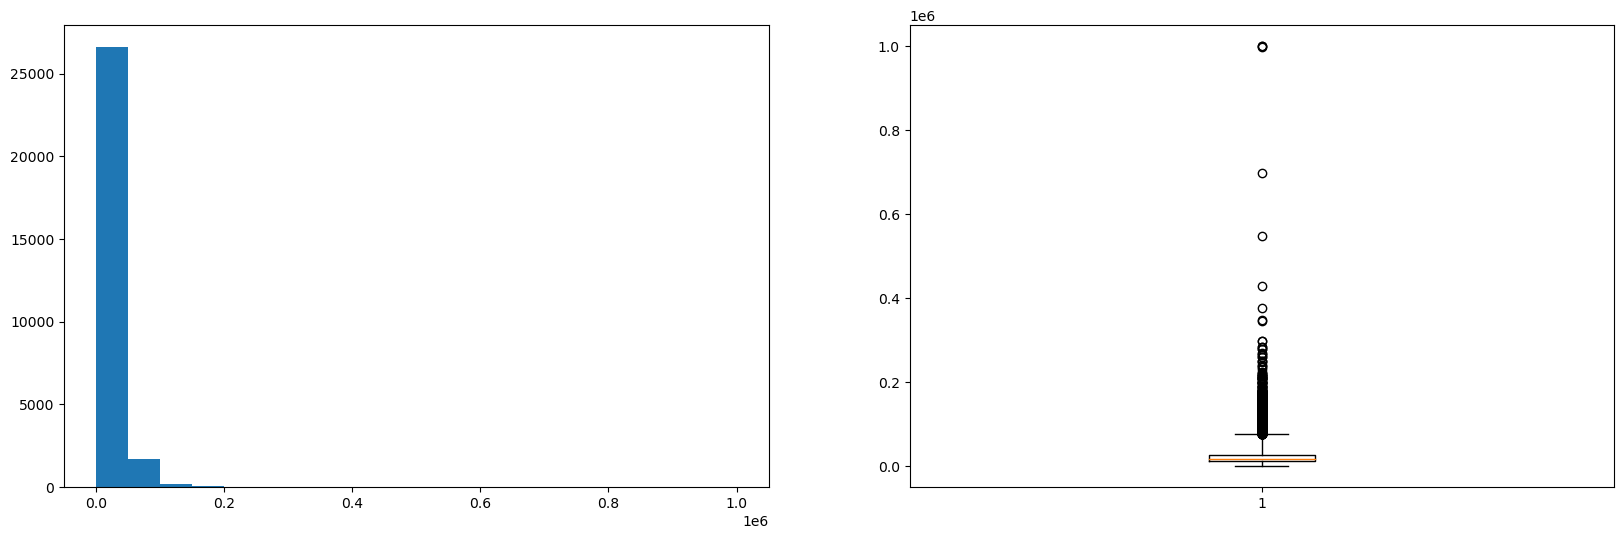

In [22]:
# Let's check how the observations in "price" feature are distributed via Histogram and Boxplot

plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df.price, bins=20)

plt.subplot(122)
plt.boxplot(df.price, whis=3)

plt.show()

In [23]:
# Let's examine the first highest 20 observation in "price" to see if there have been some extreme values away from others

df.sort_values(by=["price"], ascending=False)["price"].head(20)

# df.price.sort_values().head(20)

27798    999999.0
28178    999999.0
21913    998000.0
1212     696900.0
21547    549000.0
21600    430000.0
1317     375900.0
21921    349000.0
1305     344900.0
1451     299000.0
1076     299000.0
1595     284780.0
710      283900.0
1444     279063.0
1114     279000.0
1320     268900.0
1413     267810.0
19310    264900.0
1397     259880.0
1587     259000.0
Name: price, dtype: float64

In [24]:
# Let's examine the first lowest 20 observation in "price" to see if there have been some extreme values away from others

df.sort_values(by=["price"], ascending=True)["price"].head(20)

# df.price.sort_values().tail(20)

5846     490.0
19561    500.0
5513     500.0
17513    590.0
5351     600.0
5291     600.0
5296     699.0
3375     700.0
23786    700.0
5519     740.0
5279     750.0
24540    750.0
7810     750.0
20110    750.0
7833     790.0
5629     790.0
6459     790.0
2504     790.0
3149     799.0
5272     800.0
Name: price, dtype: float64

<div style="background-color: #ffeeba; padding: 10px; font-size: 16px; font-weight: bold;">
    As seen above dataset has some unexpected values of 999999.000.
</div>

**What might a data entry of 999999 mean?**

In general, a data entry of 999999 could have different meanings depending on the context and the data being entered. However, in many cases, 999999 is used as a <b>placeholder</b> OR a <b>default value to indicate missing or incomplete data</b>. Here are a few examples:

  - <u>In financial or accounting systems</u>, 999999 may be used to indicate a blank or missing account number or transaction code.

  - <u>In data processing or data analysis</u>, 999999 may be used to indicate a null value or a missing data point.

  - <u>In survey research or data collection</u>, 999999 may be used to indicate that a respondent declined to answer a question or left a question unanswered.

  - <u>In some programming languages or systems</u>, 999999 may be used as a sentinel or marker value to indicate the end of a file or a data stream.

It's important to note that the meaning of 999999 may vary depending on the specific system or context in which it is used. In any case, it's generally a good idea to consult the documentation or the data source to understand the meaning of the value in the specific context.

So, this kind of missing value code should be a value that could NOT possibly show up as a true data value in the dataset. Sometimes, codes such as "-999999" or "999999" are used so that the code is easy to recognize when you scan a column of data. Any integer value can be used, including negative numbers.

In [25]:
# Let's pick up the indeces of the lowest 20 observations to dive deep into examination

df.price.sort_values().tail(20).index[:20]

Int64Index([ 1587,  1397, 19310,  1413,  1320,  1114,  1444,   710,  1595,
             1076,  1451,  1305, 21921,  1317, 21600, 21547,  1212, 21913,
            27798, 28178],
           dtype='int64')

In [26]:
df.iloc[[1587,  1397, 19310,  1413,  1320,  1114,  1444,   710,  1595,  1076,
        1451,  1305, 21921,  1317, 21600, 21547,  1212, 21913, 27798, 28178]]

,make_model,make,model,location,price,body_type,type,doors,warranty,mileage,...,full_service_history,upholstery,previous_owner,energy_efficiency_class,age,power_kW,cons_avg,comfort_&_convenience_Package,entertainment_&_media_Package,safety_&_security_Package
1587,Mercedes-Benz G 63 Amg,Mercedes-Benz,G 63 Amg,"Meckenheimer Straße 12, 53359 Rheinbach, DE",259000.0,Off-Road/Pick-Up,Used,5.0,Yes,4003.0,...,No,Part/Full Leather,1.0,unefficient,0.0,430.0,14.4,Standard,Premium Media,Safety Premium Package
1397,Mercedes-Benz G 63 Amg,Mercedes-Benz,G 63 Amg,"Pankofen-Irlwiesen 3, 94447 Plattling, DE",259880.0,Off-Road/Pick-Up,Demonstration,5.0,Yes,9900.0,...,Yes,Part/Full Leather,1.0,unefficient,0.0,430.0,13.8,Premium,Premium Media,Safety Premium Package
19310,Nissan Skyline,Nissan,Skyline,"CTRA. DE RUBI, 88 (EDIFICIO CAN CASTANYER), 8...",264900.0,Coupe,Used,2.0,No,45000.0,...,No,Cloth,1.0,efficient,22.0,313.0,12.0,Standard,Standard Media,Safety Standard Package
1413,Mercedes-Benz G 63 Amg,Mercedes-Benz,G 63 Amg,"Hallesche Straße 150, 99734 Nordhausen, DE",267810.0,Off-Road/Pick-Up,Demonstration,5.0,Yes,3003.0,...,Yes,Part/Full Leather,1.0,unefficient,0.0,430.0,14.4,Premium,Premium Media,Safety Premium Package
1320,Mercedes-Benz G 63 Amg,Mercedes-Benz,G 63 Amg,"Poligono Industrial Sud, sector P3 Nave 10, 8...",268900.0,Off-Road/Pick-Up,Pre-registered,5.0,Yes,1800.0,...,No,Part/Full Leather,1.0,unefficient,0.0,430.0,0.0,Standard,Premium Media,Safety Standard Package
1114,Mercedes-Benz Sls,Mercedes-Benz,Sls,"Wagenzeller Str.13, 30855 Langenhagen / Kalte...",279000.0,Coupe,Used,2.0,No,30000.0,...,No,Part/Full Leather,1.0,efficient,12.0,420.0,13.2,Standard,Standard Media,Safety Standard Package
1444,Mercedes-Benz G 63 Amg,Mercedes-Benz,G 63 Amg,"Frankfurter Straße 49, 38122 Braunschweig, DE",279063.0,Off-Road/Pick-Up,Demonstration,5.0,No,9900.0,...,Yes,Part/Full Leather,1.0,unefficient,0.0,430.0,13.1,Standard,Premium Media,Safety Premium Package
710,Mercedes-Benz Amg Gt,Mercedes-Benz,Amg Gt,"Halbenrainer Straße 10, 8490 Bad Radkersburg, AT",283900.0,Convertible,Used,3.0,Yes,3569.0,...,Yes,Part/Full Leather,1.0,unefficient,0.0,409.0,13.0,Standard,Standard Media,Safety Standard Package
1595,Mercedes-Benz G 63 Amg,Mercedes-Benz,G 63 Amg,"Landshuter Str. 1, 94315 Straubing, DE",284780.0,Off-Road/Pick-Up,Demonstration,5.0,Yes,9900.0,...,Yes,Part/Full Leather,1.0,unefficient,0.0,430.0,13.8,Premium,Premium Media,Safety Premium Package
1076,Mercedes-Benz Gle 63 Amg,Mercedes-Benz,Gle 63 Amg,"Viernheimer Strasse 100, 69469 Weinheim, DE",299000.0,Coupe,Demonstration,4.0,No,8000.0,...,Yes,Part/Full Leather,1.0,unefficient,1.0,588.0,11.5,Premium,Premium Media,Safety Premium Package


In [27]:
df.iloc[[1587,  1397, 19310,  1413,  1320,  1114,  1444,   710,  1595,  1076,
        1451,  1305, 21921,  1317, 21600, 21547,  1212, 21913, 27798, 28178]]['make_model'].unique()

array(['Mercedes-Benz G 63 Amg', 'Nissan Skyline', 'Mercedes-Benz Sls',
       'Mercedes-Benz Amg Gt', 'Mercedes-Benz Gle 63 Amg', 'Ford Rs200',
       'Ford Gt', 'Volvo 240'], dtype=object)

In [28]:
# Let's take a close look at these observations for examining if their prices reflect the reality when compared with their counterparts 

# df.loc[df["make_model"] == "Mercedes-Benz G 63 AMG"][["make_model", "price", "age", "body_type", "mileage", "engine_size", "gears", "drivetrain"]]
# df.loc[df["make_model"] == "Ford GT"][["make_model", "price", "age", "body_type", "mileage", "engine_size", "gears", "drivetrain"]]
# df.loc[df["make_model"] == "Nissan Skyline"][["make_model", "price", "age", "body_type", "mileage", "engine_size", "gears", "drivetrain"]]

df.loc[df["make_model"] == "Volvo 240"][["make_model", "price", "age", "body_type", "mileage", "engine_size", "gears", "drivetrain"]]

,make_model,price,age,body_type,mileage,engine_size,gears,drivetrain
26393,Volvo 240,126950.0,40.0,Coupe,1.0,1999.0,1.0,Rear
26421,Volvo 240,15000.0,47.0,Coupe,170000.0,1999.0,5.0,Rear
26494,Volvo 240,17000.0,42.0,Coupe,109000.0,1999.0,4.0,Rear
26568,Volvo 240,126950.0,40.0,Coupe,1.0,1999.0,1.0,Rear
26596,Volvo 240,15000.0,47.0,Coupe,170000.0,1999.0,5.0,Rear
26669,Volvo 240,17000.0,42.0,Coupe,109000.0,1999.0,4.0,Rear
27798,Volvo 240,999999.0,31.0,Station Wagon,377733.0,2316.0,1.0,Rear
27799,Volvo 240,7950.0,29.0,Station Wagon,231225.0,1986.0,1.0,Rear
27803,Volvo 240,5200.0,31.0,Station Wagon,367329.0,1986.0,1.0,Rear
28178,Volvo 240,999999.0,31.0,Station Wagon,377733.0,2316.0,1.0,Rear


**Let's focus on the price range of "Volvo 240"**

In [29]:
# define a function to highlight the highest, median, and minimum values in a column
def highlight_max_median_min(s):
    is_max = s == s.max()
    is_median = s == s.median()
    is_min = s == s.min()
    return ["background-color: pink" if v else "background-color: lightgreen" if w else "background-color: yellow" if x else "" for v, w, x in zip(is_max, is_median, is_min)]

# filter the DataFrame and apply the styling function
styled_df = df.loc[df["make_model"] == "Volvo 240"][["make_model", "price", "age", "body_type", "mileage", "engine_size", "gears", "drivetrain"]].style.apply(highlight_max_median_min, subset=["price"])

# display the styled DataFrame
styled_df

,make_model,price,age,body_type,mileage,engine_size,gears,drivetrain
26393,Volvo 240,126950.000000,40.000000,Coupe,1.000000,1999.000000,1.000000,Rear
26421,Volvo 240,15000.000000,47.000000,Coupe,170000.000000,1999.000000,5.000000,Rear
26494,Volvo 240,17000.000000,42.000000,Coupe,109000.000000,1999.000000,4.000000,Rear
26568,Volvo 240,126950.000000,40.000000,Coupe,1.000000,1999.000000,1.000000,Rear
26596,Volvo 240,15000.000000,47.000000,Coupe,170000.000000,1999.000000,5.000000,Rear
26669,Volvo 240,17000.000000,42.000000,Coupe,109000.000000,1999.000000,4.000000,Rear
27798,Volvo 240,999999.000000,31.000000,Station Wagon,377733.000000,2316.000000,1.000000,Rear
27799,Volvo 240,7950.000000,29.000000,Station Wagon,231225.000000,1986.000000,1.000000,Rear
27803,Volvo 240,5200.000000,31.000000,Station Wagon,367329.000000,1986.000000,1.000000,Rear
28178,Volvo 240,999999.000000,31.000000,Station Wagon,377733.000000,2316.000000,1.000000,Rear


<div style="background-color: #ffeeba; padding: 10px; font-size: 14px; font-weight: bold;">
    According to Domain Knowledge obtained from dataset itself, there have been anomalies for the price of some observations.
</div>

In [30]:
# Let's pick up the indeces of these observations demonstrating anomaly based on Domain Knowledge above

indexMercedes = df[(df["make_model"] == "Mercedes-Benz G 63 AMG") & (df['price'] >= 400000)].index
indexVolvo = df[(df["make_model"] == "Volvo 240") & (df['price'] >= 100000)].index
indexFord = df[(df["make_model"] == "Ford GT") & (df['price'] >= 600000)].index
indexNissan = df[(df["make_model"] == "Nissan Skyline") & (df['price'] >= 140000)].index

In [31]:
# Let's drop these observations demonstrating anomaly from the DataFrame

print(df.shape)
df.drop(indexMercedes, inplace=True)
df.drop(indexVolvo, inplace=True)
df.drop(indexFord, inplace=True)
df.drop(indexNissan, inplace=True)
print(df.shape)

(28624, 30)
(28617, 30)


In [32]:
# Let's check again the first lowest 20 observation in "price" to see if there have still been some extreme values away from others

df.price.sort_values().tail(20)

1393     248800.0
1502     249890.0
21955    250000.0
1587     259000.0
1397     259880.0
1413     267810.0
1320     268900.0
1114     279000.0
1444     279063.0
710      283900.0
1595     284780.0
1076     299000.0
1451     299000.0
1305     344900.0
21921    349000.0
1317     375900.0
21600    430000.0
21547    549000.0
1212     696900.0
21913    998000.0
Name: price, dtype: float64

#### The distribution of prices after modification

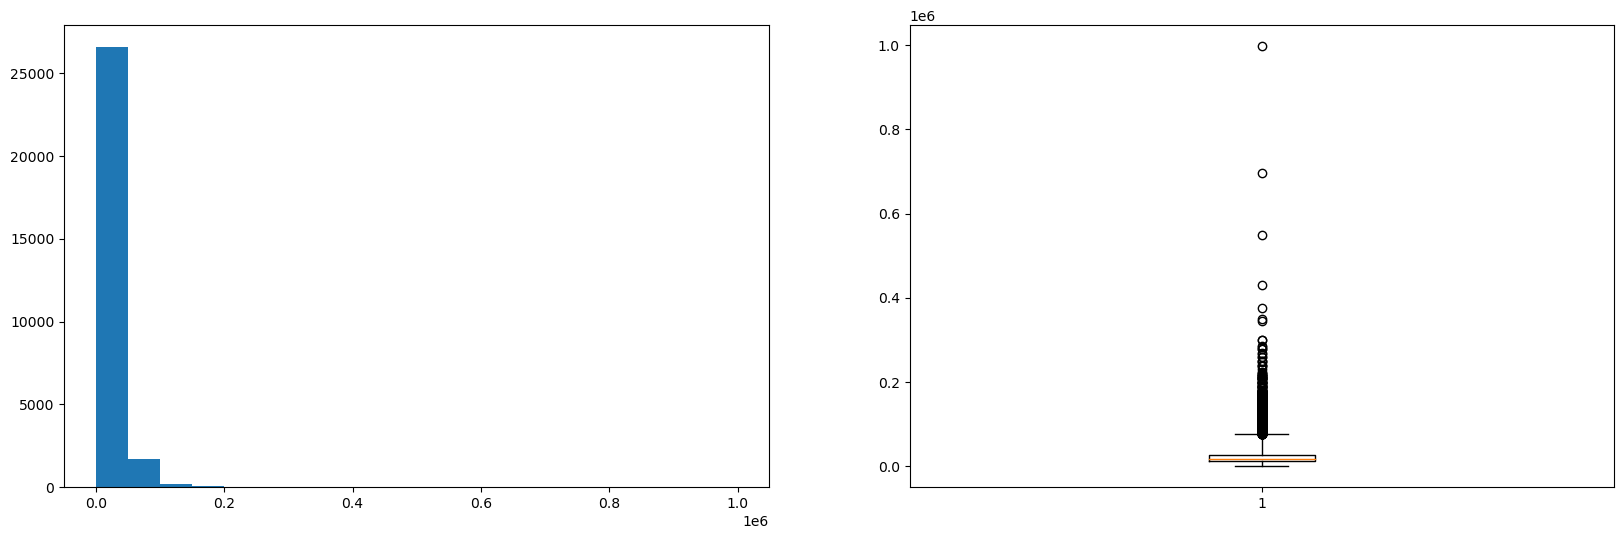

In [33]:
# Let's check again after dropping these observations how the "price" feature is distributed via Histogram and Boxplot

plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df.price, bins=20)

plt.subplot(122)
plt.boxplot(df.price, whis=3)

plt.show()

In [34]:
# plt.figure(figsize=(16, 6))
# sns.boxplot(x="make_model", y="price", data=df, whis=3)
# plt.show()

<div style="background-color: #ffeeba; padding: 10px; font-size: 14px; font-weight: bold;">
    The distribution of observations in "price" feature still does NOT look quite right. So let's try to handle extreme values using Turkey's Fence Rule.
</div>

In [35]:
# Let's determine the First & Third Quantile and Inter Quantile Range 
# so we can calculate lowest and highest boundries of fence to drop extreme values

print("Number of rows before dropping outliers:", len(df))
q1 = df["price"].quantile(0.25)
q3 = df["price"].quantile(0.75)
iqr = q3-q1  # Interquartile range

fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr

df = df.loc[(df["price"] > fence_low) & (df["price"] < fence_high)]
df.reset_index(drop=True, inplace=True)
print("Number of rows after dropping outliers:", len(df))

Number of rows before dropping outliers: 28617
Number of rows after dropping outliers: 26703


In this code snippet, we first calculate the z-scores for the 'price' feature using the formula (x - mean) / std, where x is the price value, mean is the mean price value, and std is the standard deviation of the price values. We then define a threshold for the z-score (here, we use 3 as the threshold), and drop the rows with z-scores above the threshold using boolean indexing.

Finally, we print the number of rows before and after dropping outliers to check the effectiveness of the outlier removal. You can adjust the z_threshold value to control the number of outliers that are dropped.

Note that this is just one way to identify and drop outliers from a dataset, and there are many other methods available depending on the nature of the dataset and the specific problem.

#### The distribution of prices after modification by Tukey's Fence Rule

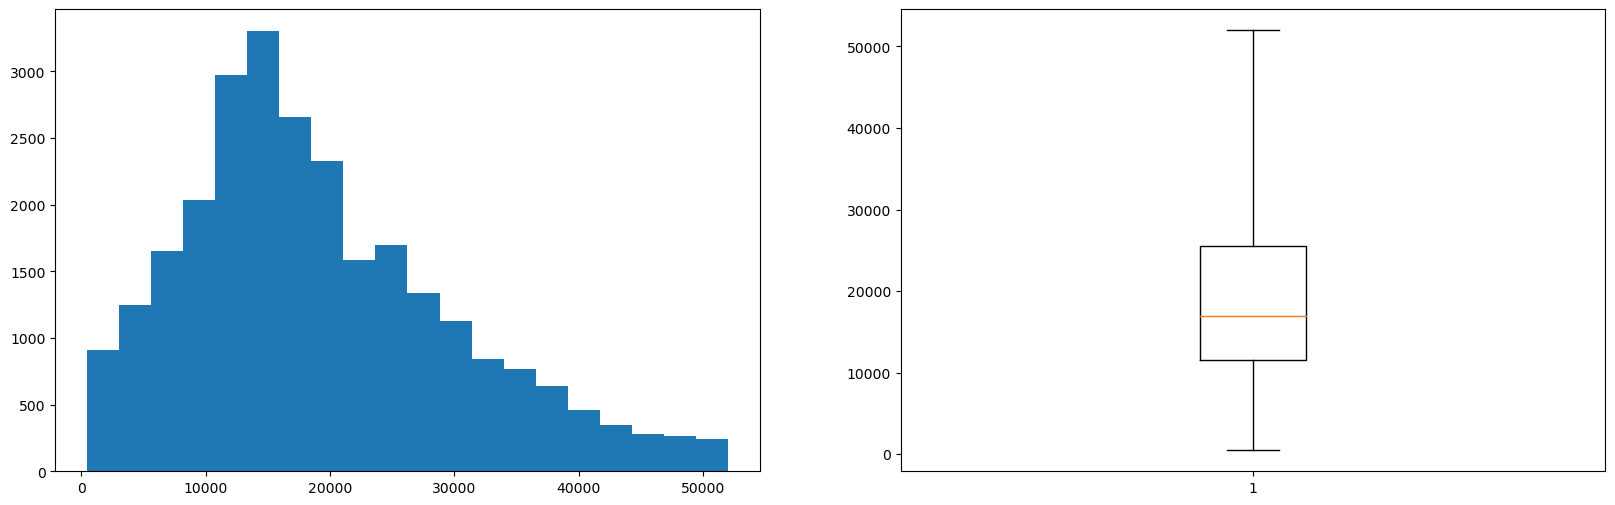

In [36]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df.price, bins=20)

plt.subplot(122)
plt.boxplot(df.price, whis=3)

plt.show()

Many methods exist for testing whether a variable has a normal distribution. 

**🧐 [6 ways to test for a Normal Distribution — which one to use?](https://towardsdatascience.com/6-ways-to-test-for-a-normal-distribution-which-one-to-use-9dcf47d8fa93#:~:text=For%20quick%20and%20visual%20identification,use%20the%20Shapiro%20Wilk%20test.)**<br>
**🧐 [A Gentle Introduction to Normality Tests in Python](https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/)**

<Figure size 1600x600 with 0 Axes>

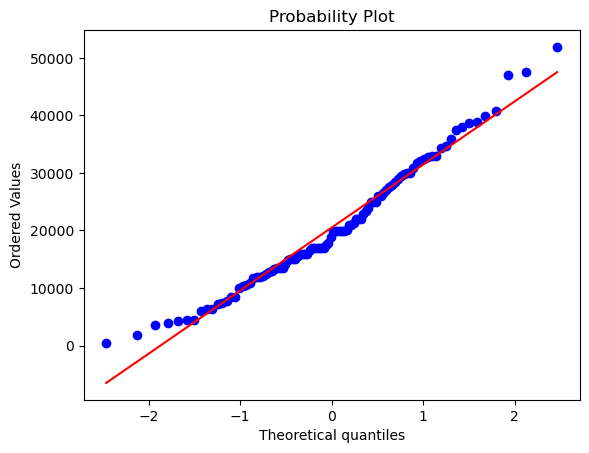

In [37]:
plt.figure(figsize=(16, 6))

# Sample 100 observations from the 'price' column
my_data = df['price'].sample(100)

# Calculate the mean and standard deviation of the sample
mu = np.mean(my_data)
sigma = np.std(my_data)

# Generate a normal distribution with the same mean and standard deviation as the sample
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = norm.pdf(x, mu, sigma)

# Plot the normal distribution as a dotted red line on the Q-Q plot
# plt.plot(x, y, 'r--', linewidth=2)

# Create the Q-Q plot
fig, ax = plt.subplots()
stats.probplot(my_data, dist="norm", plot=ax)

# Show the plot
plt.show()

Normality violation will affect the estimates of the standard error (SE) and the confidence interval, and hence the significance of the risk factors. The validation of normality sometimes can be ignored in the application of linear regression models. So normality of the features is NOT considered as an assumption in linear regression. However, normality of the residuals is an assumption in linear regression. Specifically, linear regression assumes that the residuals (the differences between the predicted values and the actual values) are normally distributed.

Normality of the residuals is important because if the residuals are not normally distributed, it can indicate that the model is NOT capturing all of the underlying patterns in the data. Non-normality of the residuals can also lead to biased estimates of the model parameters and inaccurate predictions.

Note that normality of the response variable (also known as the dependent variable or the target variable) is also an assumption in some types of linear regression, such as linear regression with maximum likelihood estimation. However, this assumption is NOT required in ordinary least squares regression, which is the most common type of linear regression. By the law of large numbers and the central limit theorem; when a dependent variable is NOT distributed normally, the ordinary least squares (OLS) estimators in linear regression technique still will be approximately normally distributed around the true parameter values and linear regression remains a statistically sound technique in studies of large sample sizes.

**🧐 [Are Linear Regression Techniques Appropriate for Analysis When the Dependent (Outcome) Variable Is Not Normally Distributed?](https://iovs.arvojournals.org/article.aspx?articleid=2128171#:~:text=The%20validation%20of%20normality%20sometimes,application%20of%20linear%20regression%20models.&text=Normality%20violation%20will%20affect%20the,significance%20of%20the%20risk%20factors.)**<br>
**🧐 [Assumptions of Regression Analysis](https://www.ncl.ac.uk/webtemplate/ask-assets/external/maths-resources/statistics/regression-and-correlation/assumptions-of-regression-analysis.html)**

**Regression Assumptions**

For the simple and multiple regression model to hold there are some assumptions we need to make:

- The chosen sample is representative of the population.
- There is a linear relationship between the independent variable(s) and the dependent variable.
- All the variables are normally distributed; to check, plot a histogram of the residuals.
- There are no outliers, (if there are outliers they need to be removed); to check use a test for detecting outliers.
- The independent variables are all linearly independent (no variable dependents of the other variables); to check plot the independent values against each other and look for a correlation.
- For multiple regression there should be at least five times as many pairs of data than dependent variables.

**Linear Assumptions**
- The mean of the distribution of errors is 0.
- The variance of errors is constant across all levels of the independent variable, this is called homoscedasticity; to check plot the residuals versus the predicted values of y.
- The distribution of errors is normal; to check this draw a histogram of the errors.
- All the errors are independent; to check plot the residuals versus the time periods.

HOWEVER, ``in general``, There are **🧐 [four assumptions associated with a linear regression model](https://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/R/R5_Correlation-Regression/R5_Correlation-Regression4.html#:~:text=Linearity%3A%20The%20relationship%20between%20X,X%2C%20Y%20is%20normally%20distributed.)**:

- ``Linearity``: The relationship between X and the mean of Y is linear.
- ``Homoscedasticity``: The variance of residual is the same for any value of X.
- ``Independence``: Observations are independent of each other.
- ``Normality``: For any fixed value of X, Y is normally distributed.

**Sum up; none of your observed variables have to be normal in linear regression analysis, which includes t-test and ANOVA. The errors after modeling, however, should be normal to draw a valid conclusion by hypothesis testing.**

**🧐 [Should I always transform my variables to make them normal?](https://data.library.virginia.edu/normality-assumption/#:~:text=Linear%20regression%20analysis%2C%20which%20includes,or%20an%20outcome%20(DV).)**

In [38]:
from scipy.stats import shapiro

# Test normality for a specific column (e.g., 'price')
column = 'price'
stat, p = shapiro(df[column])

# Interpret the result
alpha = 0.01
if p > alpha:
    print(f"The {column} column is normally distributed (p = {p:.4f})")
else:
    print(f"The {column} column is NOT normally distributed (p = {p:.4f})")

The price column is NOT normally distributed (p = 0.0000)


In [39]:
from scipy.stats import kstest, norm

my_data = df['price'].sample(50)
ks_statistic, p_value = kstest(my_data, 'norm')
print(ks_statistic, p_value)

# Interpret the result
alpha = 0.05
if p_value > alpha:
    print(f"The {column} column is normally distributed (p = {p:.4f})")
else:
    print(f"The {column} column is NOT normally distributed (p = {p:.4f})")

1.0 0.0
The price column is NOT normally distributed (p = 0.0000)


The Kolmogorov Smirnov Statistic (KS test) is well-known but it has not much power. This means that a large number of observations is necessary to reject the null hypothesis. It is also sensitive to outliers. On the other hand, it can be used for other types of distributions.

In [40]:
# Let's check some basic information after dropping/modifying extreme values in "price" feature

first_looking(df, "price")

# 28624 - 26703 = 1921 extreme values were dropped from the dataset

column name    :  price
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  4021
shape_of_df    :  (26703, 30)
--------------------------------
14990.0    222
12990.0    218
16990.0    186
19990.0    166
9990.0     160
          ... 
8925.0       1
16385.0      1
23777.0      1
34389.0      1
4440.0       1
Name: price, Length: 4021, dtype: int64


## doors

In [41]:
# Let's explore basic information about "doors"

first_looking(df, "doors")

column name    :  doors
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  6
shape_of_df    :  (26703, 30)
--------------------------------
5.0    16808
2.0     5074
4.0     2635
3.0     2179
6.0        5
1.0        2
Name: doors, dtype: int64


In [42]:
# Let's explore which cars have just one (1) door

df[df["doors"]==1]["make_model"]

9065     Fiat 124 Spider
19913        Ford Fiesta
Name: make_model, dtype: object

In [43]:
# Let's check if this door number for "Fiat 124 Spider" reflects the reality by looking at its counterparts in the DataFrame

df[df["make_model"]=="Fiat 124 Spider"][["make_model", "body_type", "doors"]].value_counts(dropna=False)

make_model       body_type    doors
Fiat 124 Spider  Convertible  2.0      64
                 Coupe        2.0      38
                 Convertible  1.0       1
                              3.0       1
dtype: int64

In [50]:
# Let's check if this door number for "Ford Fiesta" reflects the reality by looking at its counterparts in the DataFrame

df[df["make_model"]=="Ford Fiesta"][["make_model", "body_type", "doors"]].value_counts(dropna=False)

make_model   body_type  doors
Ford Fiesta  Compact    5.0      137
             Sedan      5.0      120
             Compact    3.0       77
             Sedan      3.0       31
             Compact    4.0       18
             Sedan      4.0        6
             Compact    2.0        5
             Coupe      3.0        2
             Sedan      2.0        2
             Compact    1.0        1
             Coupe      5.0        1
dtype: int64

In [52]:
# Let's explore which cars have six (6) doors

df[df["doors"]==6]["make_model"]

14948     Dacia Logan
15114     Dacia Logan
15122    Dacia Dokker
15146     Dacia Logan
15180     Dacia Logan
Name: make_model, dtype: object

In [53]:
# Let's check if this door number for "Dacia Logan" reflects the reality by looking at its counterparts in the DataFrame

df[df["make_model"]=="Dacia Logan"][["make_model", "body_type", "doors"]].value_counts(dropna=False)

make_model   body_type      doors
Dacia Logan  Station Wagon  5.0      109
                            4.0       38
             Sedan          4.0       32
             Compact        4.0       13
             Station Wagon  6.0        4
             Sedan          5.0        3
dtype: int64

In [54]:
# Let's check if this door number for "Dacia Dokker" reflects the reality by looking at its counterparts in the DataFrame

df[df["make_model"]=="Dacia Dokker"][["make_model", "body_type", "doors"]].value_counts(dropna=False)

make_model    body_type         doors
Dacia Dokker  Station Wagon     5.0      29
                                4.0      22
              Off-Road/Pick-Up  4.0       2
              Compact           4.0       1
              Sedan             4.0       1
              Station Wagon     6.0       1
dtype: int64

In [55]:
# Let's replace these number of doors with NaN

df["doors"].replace([1, 6], np.nan, inplace=True)

In [56]:
# Let's check how many missing values there have been in "doors" feature

df["doors"].isnull().sum()

7

In [57]:
# This DEF will fill the missing values in the "doors" with the mode value based on "make_model" and "body_type"

fill(df, "make_model", "body_type", "doors", "mode")

COLUMN NAME    :  doors
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  4
--------------------------------
2.0     5075
3.0     2179
4.0     2635
5.0    16814
Name: doors, dtype: int64


#### The distribution of doors

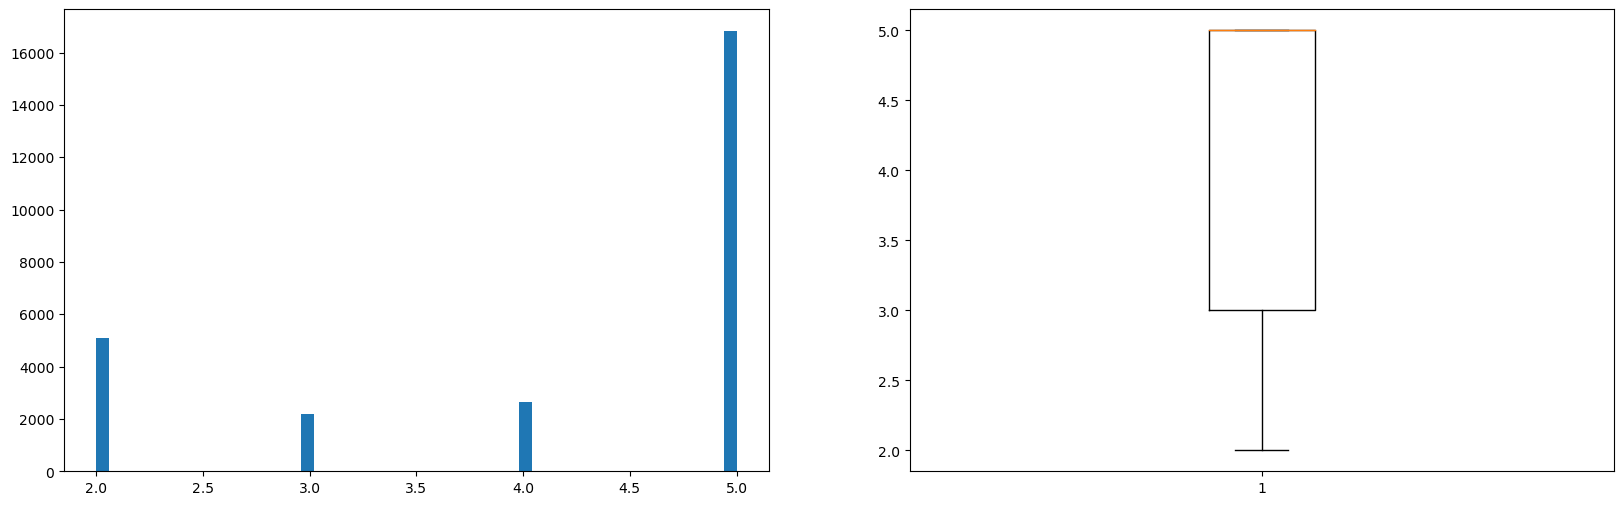

In [58]:
# Let's check how the observations in "doors" feature are distributed via Histogram and Boxplot

plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df.doors, bins=50)

plt.subplot(122)
plt.boxplot(df.doors)

plt.show()

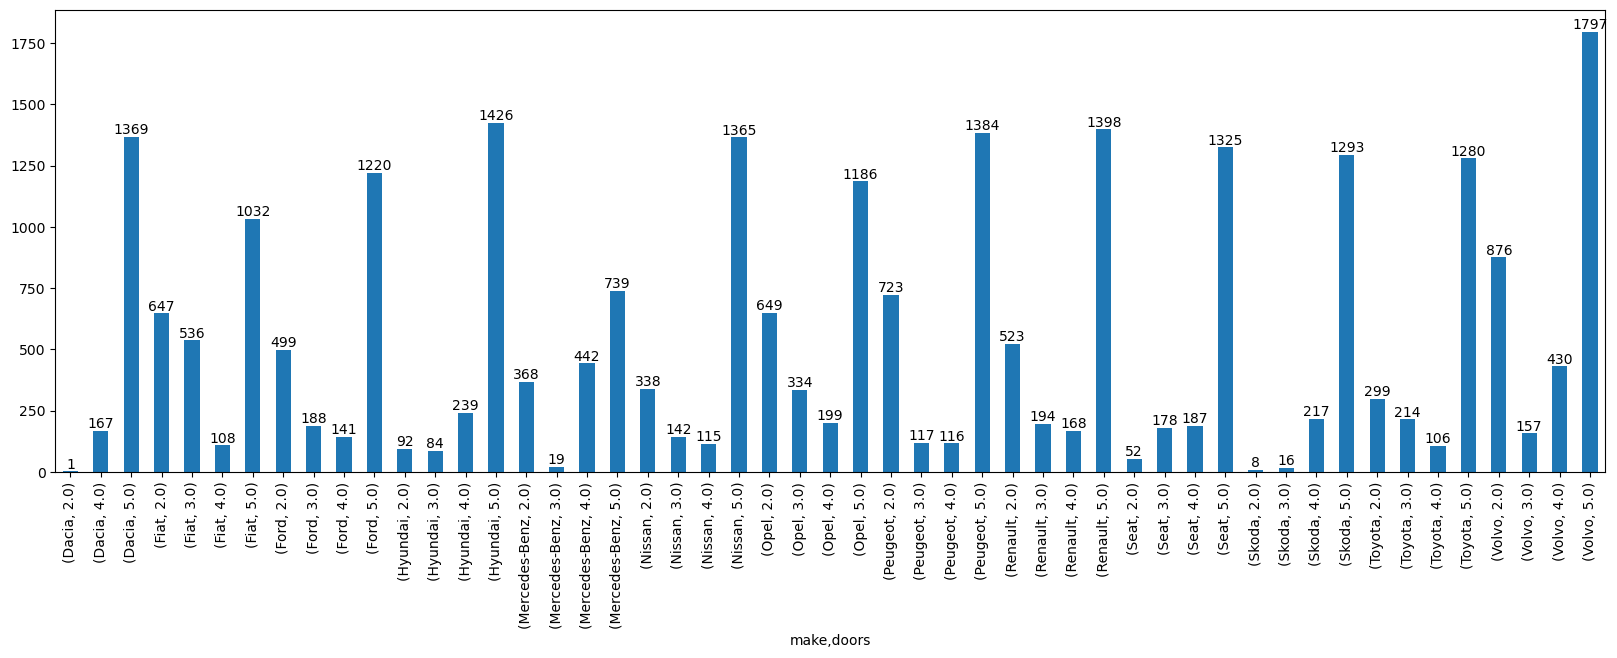

In [66]:
# Let's check how the observations in "price" feature are distributed based on their makes

fig, ax = plt.subplots()

df.groupby(["make", "doors"]).doors.count().plot.bar(figsize=(20, 6))

for container in ax.containers:
    ax.bar_label(container);

In [67]:
# Let's drop the "doors" feature from our analysis

print(df.shape)
df.drop("doors", axis=1, inplace=True)
print(df.shape)

(26703, 30)
(26703, 29)


## mileage

Right behind the age of the vehicle, most buyers will look at mileage. In some cases this is even more important than age, for example on vehicles that are known for their reliability. Typically, most cars start to experience issues after 100,000 odd miles, which can create expensive repair jobs. The lower the mileage, the more your car is likely to be worth.

In [68]:
# Let's explore basic information about "mileage"

first_looking(df, "mileage")

column name    :  mileage
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  13555
shape_of_df    :  (26703, 29)
--------------------------------
10.0        538
1.0         159
50.0        122
5.0         102
100.0        99
           ... 
48378.0       1
118190.0      1
47777.0       1
110587.0      1
230047.0      1
Name: mileage, Length: 13555, dtype: int64


In [69]:
# Let's explore Descriptive Satatistics on "mileage"

display(df.mileage.describe())

# Differences between intervals
diff1 = df.mileage.describe()['mean'] - df.mileage.describe()['std']
diff2 = df.mileage.describe()['25%'] - df.mileage.describe()['min']
diff3 = df.mileage.describe()['max'] - df.mileage.describe()['75%']

print(f"The difference between the {color.BOLD + color.BLUE}mean value{color.BLUE + color.END} ({color.BOLD + color.GREEN}{df.price.describe()['mean']:.2f}){color.BLUE + color.END} and the {color.BOLD + color.BLUE}standard deviation{color.BLUE + color.END} ({color.BOLD + color.GREEN}{df.price.describe()['std']:.2f}{color.GREEN + color.END}) is {color.BOLD + color.RED}{diff1:.2f}{color.RED + color.END}.")
print(f"The difference between the {color.BOLD + color.BLUE}25th percentile{color.BLUE + color.END} ({color.BOLD + color.GREEN}{df.price.describe()['25%']:.2f}){color.BLUE + color.END} and the {color.BOLD + color.BLUE}minimum value{color.BLUE + color.END} ({color.BOLD + color.GREEN}{df.price.describe()['min']:.2f}{color.GREEN + color.END}) is {color.BOLD + color.RED}{diff2:.2f}{color.RED + color.END}.")
print(f"The difference between the {color.BOLD + color.BLUE}75th percentile{color.BLUE + color.END} ({color.BOLD + color.GREEN}{df.price.describe()['75%']:.2f}){color.BLUE + color.END} and the {color.BOLD + color.BLUE}maximum value{color.BLUE + color.END} ({color.BOLD + color.GREEN}{df.price.describe()['max']:.2f}{color.GREEN + color.END}) is {color.BOLD + color.RED}{diff3:.2f}{color.RED + color.END}.")

count    2.670300e+04
mean     7.592003e+04
std      6.801088e+04
min      0.000000e+00
25%      2.376950e+04
50%      6.140000e+04
75%      1.105000e+05
max      1.440000e+06
Name: mileage, dtype: float64

The difference between the mean value (19204.72) and the standard deviation (10817.27) is 7909.14.
The difference between the 25th percentile (11512.50) and the minimum value (490.00) is 23769.50.
The difference between the 75th percentile (25585.00) and the maximum value (51980.00) is 1329500.00.


#### The distribution of mileages

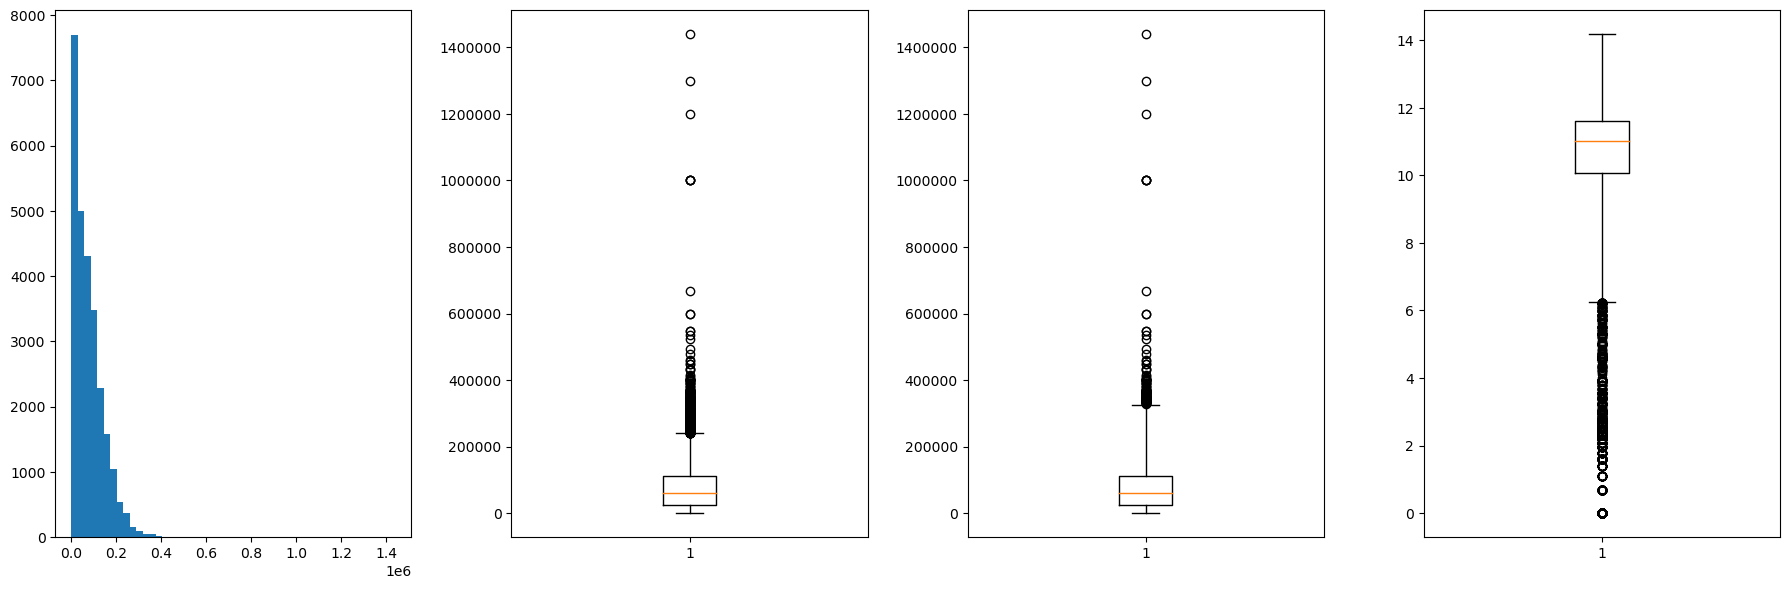

In [70]:
# Let's check how the observations in "mileage" feature are distributed via Histogram and Boxplot

plt.figure(figsize=(18, 6))

plt.subplot(141)
plt.hist(df.mileage, bins=50)

plt.subplot(142)
plt.boxplot(df.mileage)
plt.ticklabel_format(style='plain', axis='y')  # suppress scientific notation in the y-axis tick labels

plt.subplot(143)
plt.boxplot(df.mileage, whis=2.5)  # boxplot based on 2.5 whisker
plt.ticklabel_format(style='plain', axis='y')  # suppress scientific notation in the y-axis tick labels

plt.subplot(144)
plt.boxplot(np.log(df.mileage), whis=2.5)  # boxplot based on 2.5 whisker after logaritmic transformation

plt.tight_layout()
plt.show()

In [71]:
# Let's examine the first lowest 20 observation in "mileage" to see if there have been some extreme values away from others

df.sort_values(by=["mileage"], ascending=False)["mileage"].head(20)

df.mileage.sort_values().head(20)

2849     0.0
14967    0.0
3783     0.0
2879     0.0
13771    0.0
13814    0.0
5530     0.0
10494    0.0
3606     0.0
9321     0.0
17243    0.0
9992     0.0
10032    0.0
15391    0.0
21352    0.0
20412    0.0
22782    0.0
21427    0.0
10257    0.0
10128    0.0
Name: mileage, dtype: float64

In [78]:
# Let's examine the first highest 20 observation in "mileage" to see if there have been some extreme values away from others

df.sort_values(by=["mileage"], ascending=True)["mileage"].head(20)

df.mileage.sort_values().tail(20)

26049     448914.0
26372     448914.0
255       457379.0
5587      461626.0
18867     477000.0
2625      494457.0
17220     523992.0
2382      536388.0
13395     546888.0
16794     547000.0
13381     600000.0
26551     600001.0
12202     667128.0
20069     999999.0
2566      999999.0
6769     1000000.0
21387    1000001.0
11219    1199900.0
16305    1300000.0
17750    1440000.0
Name: mileage, dtype: float64

In [79]:
# Let's explore which cars' milage is higher than a million (1000000)

df[df["mileage"] > 1000000][["make_model", "type", "mileage", "age"]]

,make_model,type,mileage,age
11219,Seat Ibiza,Used,1199900.0,4.0
16305,Toyota Celica,Used,1300000.0,36.0
17750,Nissan Micra,Used,1440000.0,3.0
21387,Ford Fiesta,Used,1000001.0,4.0


In [80]:
# Let's pick up the indices of cars whose milage is higher than a million (1000000)

drop_mileage_index = df[df["mileage"] > 1000000][["make_model", "type", "mileage", "age"]].index
drop_mileage_index

Int64Index([11219, 16305, 17750, 21387], dtype='int64')

In [81]:
# Let's drop the cars whose milage is higher than a million (1000000) from our DataFraame

print(df.shape)
df.drop(drop_mileage_index, inplace=True)
print(df.shape)

(26703, 29)
(26699, 29)


#### The distribution of mileages after modification

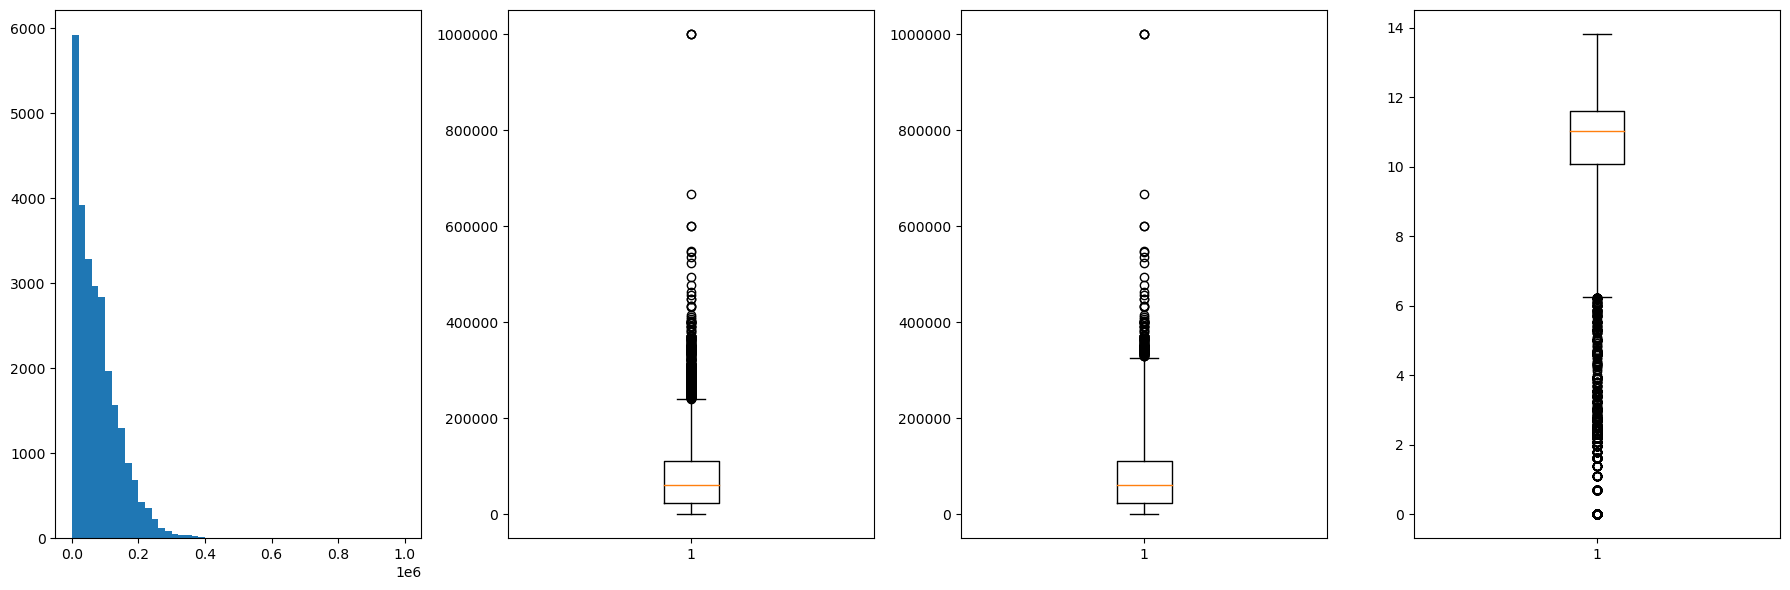

In [82]:
# After dropping these observations, let's check how they are distributed via Histogram and Boxplot

plt.figure(figsize=(18, 6))

plt.subplot(141)
plt.hist(df.mileage, bins=50)

plt.subplot(142)
plt.boxplot(df.mileage)
plt.ticklabel_format(style='plain', axis='y')  # suppress scientific notation in the y-axis tick labels

plt.subplot(143)
plt.boxplot(df.mileage, whis=2.5)  # boxplot based on 2.5 whisker
plt.ticklabel_format(style='plain', axis='y')  # suppress scientific notation in the y-axis tick labels

plt.subplot(144)
plt.boxplot(np.log(df.mileage), whis=2.5)  # boxplot based on 2.5 whisker after logaritmic transformation

plt.tight_layout()
plt.show()

<div style="background-color: #ffeeba; padding: 10px; font-size: 14px; font-weight: bold;">
    <code>mileage</code> is a variable with a wide range of values. Although these extreme values above CANNOT be considered as  genuine outliers since they might be a part of real world scenerio; however, they might affect regression lines, making the regression lines less accurate in predicting other data and causing the slope of the line of best fit to be less steep than you might expect. So, we will NOT keep these extreme values as they are.
</div>

**🧐 [Effects of outliers on regression model?](https://discuss.analyticsvidhya.com/t/effects-of-outliers-on-regression-model/2403)**

In [83]:
# Let's determine the First & Third Quantile and Inter Quantile Range 
# so we can calculate lowest and highest boundries of fence to drop extreme values

print("Number of rows before dropping outliers:", len(df))
q1 = df["mileage"].quantile(0.25)
q3 = df["mileage"].quantile(0.75)
iqr = q3-q1 #Interquartile range

fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr

df = df.loc[(df["mileage"] > fence_low) & (df["mileage"] < fence_high)]
df.reset_index(drop=True, inplace=True)
print("Number of rows after dropping outliers:", len(df))

Number of rows before dropping outliers: 26699
Number of rows after dropping outliers: 26115


#### The distribution of mileages after modification by Tukey's Fence Rule

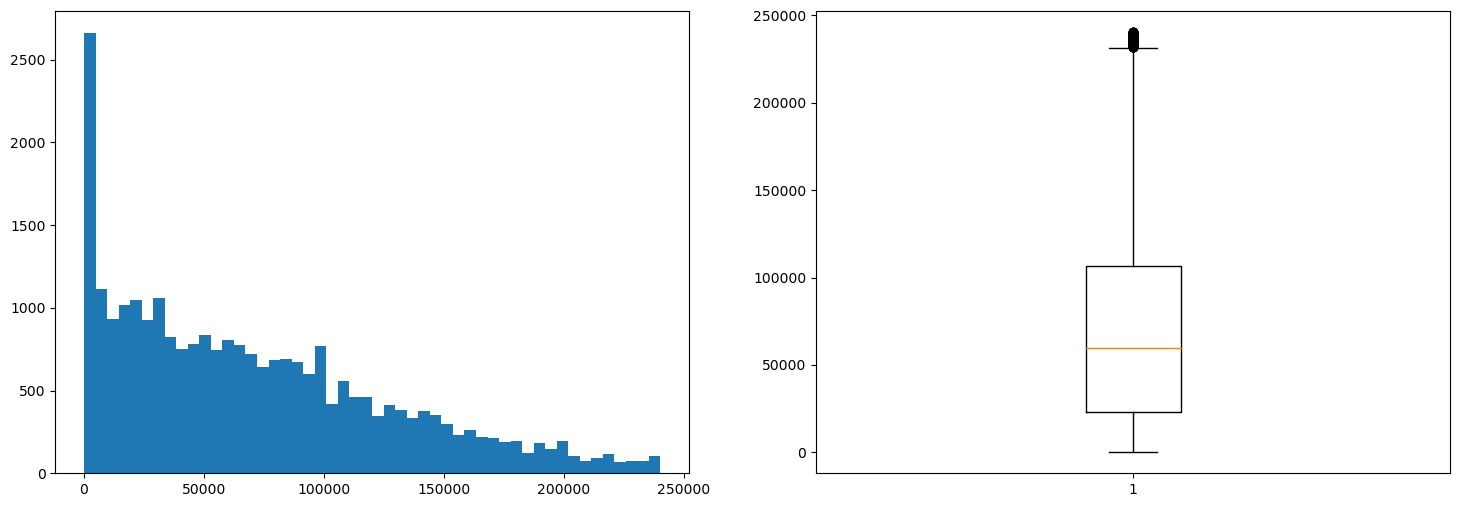

In [84]:
plt.figure(figsize=(18, 6))

plt.subplot(121)
plt.hist(df.mileage, bins=50)

plt.subplot(122)
plt.boxplot(df.mileage)

plt.show()

<Figure size 2000x600 with 0 Axes>

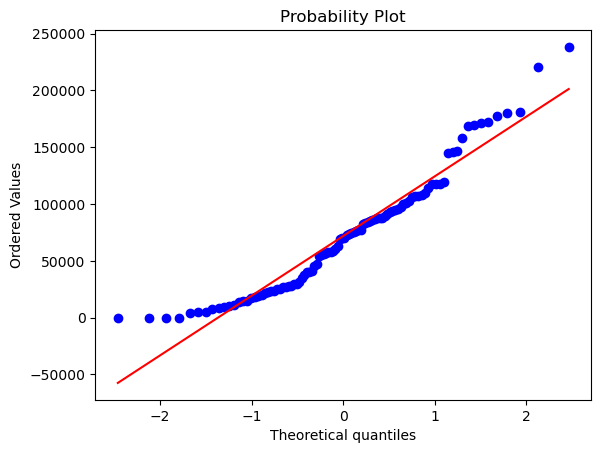

In [87]:
plt.figure(figsize=(20, 6))

# Sample 100 observations from the 'mileage' column
my_data = df['mileage'].sample(100)

# Calculate the mean and standard deviation of the sample
mu = np.mean(my_data)
sigma = np.std(my_data)

# Generate a normal distribution with the same mean and standard deviation as the sample
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = norm.pdf(x, mu, sigma)

# Plot the normal distribution as a dotted red line on the Q-Q plot
# plt.plot(x, y, 'r--', linewidth=2)

# Create the Q-Q plot
fig, ax = plt.subplots()
stats.probplot(my_data, dist="norm", plot=ax)

# Show the plot
plt.show();

In [88]:
# Let's check some basic information after dropping/modifying extreme values in "price" feature

first_looking(df, "mileage")

# 26703 - 26115 = 588 extreme values were dropped from the dataset

column name    :  mileage
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  13195
shape_of_df    :  (26115, 29)
--------------------------------
10.0        538
1.0         159
50.0        122
5.0         102
100.0        99
           ... 
22033.0       1
48378.0       1
118190.0      1
47777.0       1
230047.0      1
Name: mileage, Length: 13195, dtype: int64


In [ ]:
# df["mileage_logged"] = np.log(df.mileage)

## seats

In [89]:
# Let's explore basic information about "seats"

first_looking(df, "seats")

column name    :  seats
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  10
shape_of_df    :  (26115, 29)
--------------------------------
5.0    19379
4.0     5195
2.0     1029
7.0      393
8.0       39
9.0       32
3.0       25
6.0        9
0.0        9
1.0        5
Name: seats, dtype: int64


In [90]:
print(df.shape)
df.drop("seats", axis=1, inplace=True)
print(df.shape)

(26115, 29)
(26115, 28)


## engine_size

In [91]:
# Let's explore basic information about "engine_size"

first_looking(df, "engine_size")

column name    :  engine_size
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  413
shape_of_df    :  (26115, 28)
--------------------------------
1598.0    2180
999.0     2143
1969.0    1602
1461.0    1106
1998.0     967
          ... 
1489.0       1
2991.0       1
2980.0       1
2956.0       1
2473.0       1
Name: engine_size, Length: 413, dtype: int64


In [92]:
# Let's explore Descriptive Satatistics on "engine_size"

display(df.engine_size.describe())

# Differences between intervals
diff1 = df.engine_size.describe()['mean'] - df.engine_size.describe()['std']
diff2 = df.engine_size.describe()['25%'] - df.engine_size.describe()['min']
diff3 = df.engine_size.describe()['max'] - df.engine_size.describe()['75%']

print(f"The difference between the {color.BOLD + color.BLUE}mean value{color.BLUE + color.END} ({color.BOLD + color.GREEN}{df.price.describe()['mean']:.2f}){color.BLUE + color.END} and the {color.BOLD + color.BLUE}standard deviation{color.BLUE + color.END} ({color.BOLD + color.GREEN}{df.price.describe()['std']:.2f}{color.GREEN + color.END}) is {color.BOLD + color.RED}{diff1:.2f}{color.RED + color.END}.")
print(f"The difference between the {color.BOLD + color.BLUE}25th percentile{color.BLUE + color.END} ({color.BOLD + color.GREEN}{df.price.describe()['25%']:.2f}){color.BLUE + color.END} and the {color.BOLD + color.BLUE}minimum value{color.BLUE + color.END} ({color.BOLD + color.GREEN}{df.price.describe()['min']:.2f}{color.GREEN + color.END}) is {color.BOLD + color.RED}{diff2:.2f}{color.RED + color.END}.")
print(f"The difference between the {color.BOLD + color.BLUE}75th percentile{color.BLUE + color.END} ({color.BOLD + color.GREEN}{df.price.describe()['75%']:.2f}){color.BLUE + color.END} and the {color.BOLD + color.BLUE}maximum value{color.BLUE + color.END} ({color.BOLD + color.GREEN}{df.price.describe()['max']:.2f}{color.GREEN + color.END}) is {color.BOLD + color.RED}{diff3:.2f}{color.RED + color.END}.")

count    26115.000000
mean      1664.421290
std        986.240601
min          0.000000
25%       1242.000000
50%       1582.000000
75%       1969.000000
max      99900.000000
Name: engine_size, dtype: float64

The difference between the mean value (19505.32) and the standard deviation (10722.62) is 678.18.
The difference between the 25th percentile (11950.00) and the minimum value (490.00) is 1242.00.
The difference between the 75th percentile (25900.00) and the maximum value (51980.00) is 97931.00.


#### The distribution of engine sizes

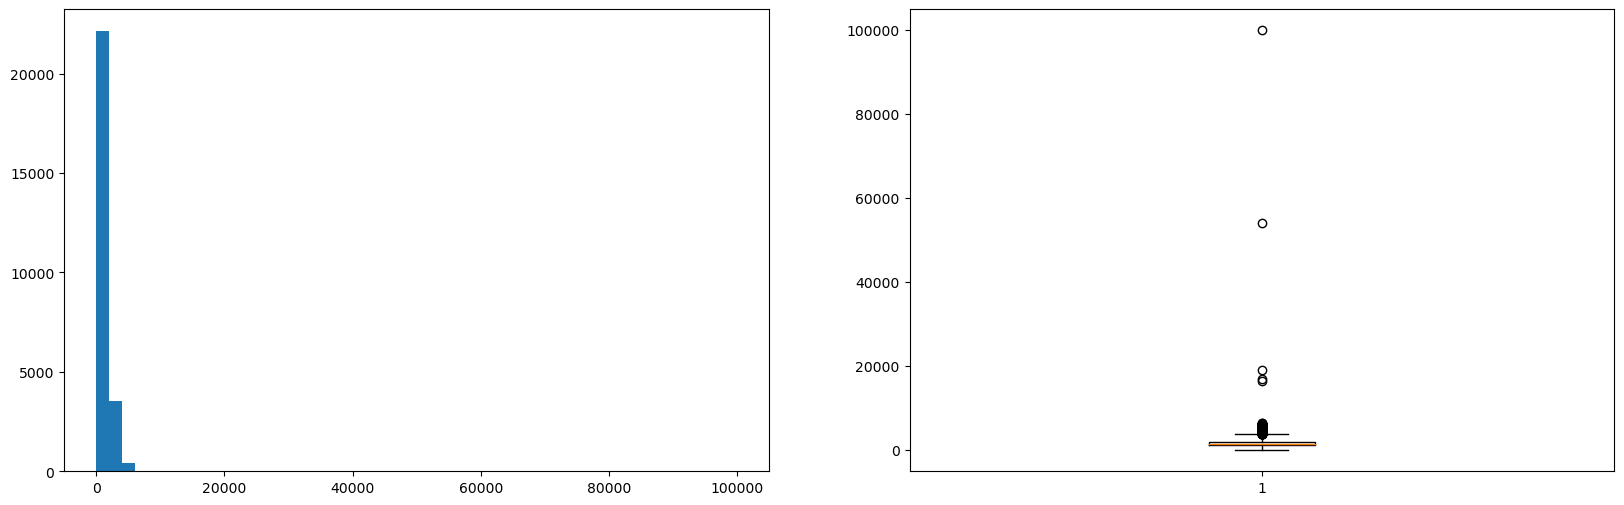

In [93]:
# Let's check how the observations in "engine_size" feature are distributed via Histogram and Boxplot

plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df["engine_size"], bins=50)

plt.subplot(122)
plt.boxplot(df["engine_size"], whis=2.5)  # boxplot based on 2.5 whisker

plt.show()

In [94]:
# Let's examine the first highest 20 observation in "engine_size" to see if there have been some extreme values away from others

df.sort_values(by=["engine_size"], ascending=False)["engine_size"].head(20)

# df["engine_size"].sort_values(ascending=False).head(20)

15311    99900.0
19681    54009.0
550      19194.0
4619     16998.0
14869    16597.0
19690     6400.0
19729     6387.0
539       6300.0
535       6300.0
19802     6294.0
19683     6276.0
542       6209.0
608       6208.0
555       6208.0
618       6208.0
1395      6208.0
625       6208.0
1340      6208.0
529       6208.0
1263      6208.0
Name: engine_size, dtype: float64

In [95]:
# Let's examine the first lowest 20 observation in "engine_size" to see if there have been some extreme values away from others

df.sort_values(by=["engine_size"], ascending=True)["engine_size"].head(20)

# df["engine_size"].sort_values(ascending=True).head(20)

8970     0.0
5905     0.0
8905     0.0
9479     0.0
5862     0.0
6073     0.0
6074     0.0
13917    0.0
7662     0.0
15162    0.0
13918    0.0
15077    0.0
6076     0.0
18936    0.0
13919    0.0
8528     0.0
1796     0.0
10468    0.0
17334    0.0
15073    0.0
Name: engine_size, dtype: float64

In [96]:
# Let's explore maximum occurances of each unique "engine_size"

df["engine_size"].value_counts().sort_index(ascending=True)

0.0        239
1.0         74
2.0          7
4.0          2
5.0          3
          ... 
16597.0      1
16998.0      1
19194.0      1
54009.0      1
99900.0      1
Name: engine_size, Length: 413, dtype: int64

In [97]:
# Let's explore which cars' engine sizes are higher than five hundreds (500)

df[df["engine_size"] <= 500][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type"]]\
                            .sort_values(by=["engine_size"], ascending=True)

,make_model,age,body_type,gearbox,drivetrain,gears,engine_size,fuel_type
8401,Fiat 500E,0.0,Compact,Automatic,Front,1.0,0.0,Electric
9421,Fiat 500E,1.0,Coupe,Automatic,Front,1.0,0.0,Electric
9479,Fiat 500,0.0,Coupe,Automatic,Front,1.0,0.0,Electric
9485,Fiat 500E,1.0,Coupe,Automatic,Front,1.0,0.0,Electric
17334,Nissan Leaf,3.0,Compact,Automatic,Front,1.0,0.0,Electric
...,...,...,...,...,...,...,...,...
9515,Fiat 500L,50.0,Coupe,Manual,Rear,4.0,499.0,Benzine
10099,Fiat 500,52.0,Station Wagon,Manual,Front,5.0,499.0,Benzine
9499,Fiat 500L,51.0,Coupe,Manual,Rear,4.0,499.0,Benzine
9040,Fiat 500,59.0,Convertible,Manual,Rear,4.0,500.0,Benzine


In [98]:
# Let's explore minimum occurances of each unique "engine_size"

df["engine_size"].value_counts().sort_index(ascending=False)

99900.0      1
54009.0      1
19194.0      1
16998.0      1
16597.0      1
          ... 
5.0          3
4.0          2
2.0          7
1.0         74
0.0        239
Name: engine_size, Length: 413, dtype: int64

In [99]:
# Let's explore which cars' engine sizes are higher than four thousands (4000)

df[df["engine_size"] > 4000][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type"]]\
                            .sort_values(by=["engine_size"], ascending=False)

,make_model,age,body_type,gearbox,drivetrain,gears,engine_size,fuel_type
15311,Dacia Sandero,3.0,Sedan,Manual,Front,5.0,99900.0,Benzine
19681,Ford Mustang,14.0,Convertible,Manual,Rear,6.0,54009.0,Benzine
550,Mercedes-Benz Sl 320,21.0,Convertible,Automatic,Rear,5.0,19194.0,Benzine
4619,Renault Megane,7.0,Coupe,Manual,Front,6.0,16998.0,Benzine
14869,Dacia Dokker,0.0,Station Wagon,Manual,Front,5.0,16597.0,Liquid/Natural Gas
...,...,...,...,...,...,...,...,...
19774,Ford Mustang,11.0,Convertible,Automatic,Rear,6.0,4009.0,Benzine
19967,Ford Mustang,16.0,Coupe,Automatic,Rear,5.0,4009.0,Benzine
19975,Ford Mustang,12.0,Coupe,Automatic,Rear,10.0,4009.0,Benzine
19772,Ford Mustang,16.0,Convertible,Automatic,Rear,6.0,4009.0,Benzine


In [ ]:
# Let's take a close look at some of these observations for examining if their engine sizes reflect the reality when compared with their counterparts 

# df.loc[df.make_model == "Ford Thunderbird"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type"]]
# df.loc[df.make_model == "Ford Fairlane"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type"]]
# df.loc[df.make_model == "Dacia Sandero"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type"]]
# df.loc[df.make_model == "Mercedes-Benz SL 320"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type"]]
# df.loc[df.make_model == "Renault Megane"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type"]]
# df.loc[df.make_model == "Dacia Dokker"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type"]]

**Let's focus on the engine size range of "Dacia Dokker"**

In [103]:
# define a function to highlight the highest, median, and minimum values in a column
def highlight_max_median_min(s):
    is_max = s == s.max()
    is_median = s == s.median()
    is_min = s == s.min()
    return ["background-color: pink" if v else "background-color: lightgreen" if w else "background-color: yellow" if x else "" for v, w, x in zip(is_max, is_median, is_min)]

# filter the DataFrame and apply the styling function
styled_df = df.loc[df.make_model == "Dacia Dokker"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type"]].style.apply(highlight_max_median_min, subset=["engine_size"])

# display the styled DataFrame
styled_df

,make_model,age,body_type,gearbox,drivetrain,gears,engine_size,fuel_type
14143,Dacia Dokker,4.000000,Compact,Manual,Front,5.000000,1461.000000,Diesel
14623,Dacia Dokker,4.000000,Off-Road/Pick-Up,Manual,Front,5.000000,1598.000000,Benzine
14638,Dacia Dokker,4.000000,Off-Road/Pick-Up,Manual,Front,5.000000,1598.000000,Liquid/Natural Gas
14698,Dacia Dokker,3.000000,Station Wagon,Manual,Front,5.000000,1598.000000,Benzine
14701,Dacia Dokker,3.000000,Station Wagon,Manual,Front,5.000000,1598.000000,Benzine
14702,Dacia Dokker,2.000000,Station Wagon,Manual,Front,5.000000,1598.000000,Diesel
14705,Dacia Dokker,4.000000,Station Wagon,Manual,Front,5.000000,1598.000000,Diesel
14711,Dacia Dokker,3.000000,Station Wagon,Manual,Front,5.000000,1598.000000,Liquid/Natural Gas
14713,Dacia Dokker,4.000000,Station Wagon,Manual,Front,5.000000,1598.000000,Benzine
14722,Dacia Dokker,5.000000,Station Wagon,Manual,Front,5.000000,1461.000000,Diesel


### 📝 Domain Knowledge About Some Vehicles on the List Above:
**🧐 [SOURCE](https://www.automobile-catalog.com/#gsc.tab=0)**

- **Ford Thunderbird Convertible (1964-1966)**, manufactured or offered in the years 1964-1966 with convertible body_type, equipped with engines of **6384 - 6997 cc (389.6 - 427 cui) displacement**, delivering 223.5 - 257 kW (304 - 350 PS, 300 - 345 hp) of horsepower.

- **Ford Fairlane**, 2-Door Hardtop 390 Thunderbird V-8 (man. 3) , model year 1968, version for North America U.S. manufactured by Ford (USA) in United States, 2-door coupe body_type, RWD (rear-wheel drive), manual 3-speed gearbox, gasoline (petrol) engine with **displacement: 6384 cm3 / 389.6 cui**, advertised power: 197.5 kW / 265 hp / 269 PS ( SAE gross ), torque: 529 Nm / 390 lb-ft.

- **Ford Mustang Mach**, manufactured by Ford (USA) in United States, 2-door coupe body_type, RWD (rear-wheel drive), manual 4-speed gearbox, gasoline (petrol) engine with **displacement: 7033 cm3 / 429.2 cui**, advertised power: 276 kW / 370 hp / 375 PS ( SAE gross ), torque: 610 Nm / 450 lb-ft.

- **Dacia Sandero SCe 65 (man. 5) (Access, Essential, Comfort)** in 2021, the model with 5-door hatchback body and Line-3 999 cm3 / 61.1 cui, 49 kW / 67 PS / 66 hp (ECE) of power, 95 Nm / 70 lb-ft of torque, 5-speed manual powertrain offered since March 2021 for Europe, **Displacement: 999 cm3 / 61.1 cui**.

- **Mercedes-Benz SL 320 (aut. 5)** in 1993, the model with 2-door convertible body and Line-6 3199 cm3 / 195.5 cui, 170 kW / 231 PS / 228 hp (ECE) of power, 315 Nm / 232 lb-ft of torque, 5-speed automatic powertrain offered since July 1993 for Europe **Displacement: 3199 cm3 / 195.5 cui**.

- **Renault Megane Coupe 1.6 Energy dCi 130 (man. 6) in 2015**, the model with 3-door hatchback (coupe) body and Line-4 1598 cm3 / 97.6 cui, 95.5 kW / 130 PS / 128 hp (ECE) of power, 320 Nm / 236 lb-ft of torque, 6-speed manual powertrain for Europe, **Displacement: 1598 cm3 / 97.6 cui**.

- **Dacia Dokker Stepway TCe 130 (man. 6)**, manufactured by Dacia in Romania assembly in Morocco, 5-door mpv body_type, FWD (front-wheel drive), manual 6-speed gearbox, gasoline (petrol) engine with **displacement: 1332 cm3 / 81.1 cui**, advertised power: 95.5 kW / 128 hp / 130 PS ( ECE ), torque: 240 Nm / 177 lb-ft

In [104]:
# According to Domain Knowledge above, let's explore the vehicles having engine sizes between two (2) and five hundreds (500)

df[(df["engine_size"] >= 2) & (df["engine_size"] <= 500)][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type"]]\
                            .sort_values(by=["engine_size"], ascending=True)

,make_model,age,body_type,gearbox,drivetrain,gears,engine_size,fuel_type
26021,Volvo S90,1.0,Sedan,Automatic,4WD,8.0,2.0,Electric
1116,Mercedes-Benz C 250,7.0,Station Wagon,Automatic,4WD,7.0,2.0,Benzine
25004,Volvo Xc60,0.0,Off-Road/Pick-Up,Automatic,4WD,8.0,2.0,Diesel
24725,Volvo Xc60,0.0,Off-Road/Pick-Up,Automatic,4WD,8.0,2.0,Diesel
20436,Ford Kuga,4.0,Off-Road/Pick-Up,Manual,4WD,6.0,2.0,Diesel
20120,Ford Kuga,1.0,Off-Road/Pick-Up,Automatic,4WD,6.0,2.0,Electric
25867,Volvo S90,1.0,Sedan,Automatic,4WD,8.0,2.0,Electric
15821,Toyota Mr 2,30.0,Convertible,Manual,4WD,1.0,4.0,Benzine
12064,Seat Leon,1.0,Sedan,Automatic,Front,6.0,4.0,Benzine
20063,Ford Mustang,2.0,Coupe,Automatic,Rear,10.0,5.0,Benzine


In [105]:
# Let's take a close look at some of these observations for examining if their engine sizes reflect the reality when compared with their counterparts 

# df.loc[df.make_model == "Volvo S90"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type"]]
# df.loc[df.make_model == "Ford Kuga"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type"]]
# df.loc[df.make_model == "Volvo XC60"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type"]]
# df.loc[df.make_model == "Mercedes-Benz E 220"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type"]]
# df.loc[df.make_model == "Dacia Duster"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type"]]
# df.loc[df.make_model == "Fiat 500 Abarth"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type"]]
# df.loc[df.make_model == "Opel Calibra"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type"]]
# df.loc[df.make_model == "Ford Mustang"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type"]]
# df.loc[df.make_model == "SEAT Leon"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type"]]
# df.loc[df.make_model == "Toyota MR 2"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type"]]


df.loc[df.make_model == "Renault Megane"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type"]]

,make_model,age,body_type,gearbox,drivetrain,gears,engine_size,fuel_type
3864,Renault Megane,1.0,Compact,Manual,Front,6.0,1332.0,Benzine
3867,Renault Megane,1.0,Compact,Automatic,Front,6.0,1798.0,Benzine
3869,Renault Megane,4.0,Compact,Automatic,Front,7.0,1500.0,Diesel
3871,Renault Megane,7.0,Compact,Manual,Front,6.0,1461.0,Diesel
3873,Renault Megane,8.0,Compact,Manual,Front,6.0,1461.0,Diesel
...,...,...,...,...,...,...,...,...
6071,Renault Megane,3.0,Sedan,Automatic,Front,7.0,1332.0,Benzine
6075,Renault Megane,10.0,Sedan,Manual,Front,6.0,1200.0,Benzine
6077,Renault Megane,2.0,Sedan,Manual,Front,6.0,1461.0,Diesel
6078,Renault Megane,2.0,Sedan,Automatic,Front,7.0,1461.0,Diesel


**Let's focus on the engine size range of "Renault Megane"**

In [106]:
# define a function to highlight the highest, median, and minimum values in a column
def highlight_max_median_min(s):
    is_max = s == s.max()
    is_median = s == s.median()
    is_min = s == s.min()
    return ["background-color: pink" if v else "background-color: lightgreen" if w else "background-color: yellow" if x else "" for v, w, x in zip(is_max, is_median, is_min)]

# filter the DataFrame and apply the styling function
styled_df = df.loc[df.make_model == "Renault Megane"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type"]].style.apply(highlight_max_median_min, subset=["engine_size"])

# display the styled DataFrame
styled_df

,make_model,age,body_type,gearbox,drivetrain,gears,engine_size,fuel_type
3864,Renault Megane,1.000000,Compact,Manual,Front,6.000000,1332.000000,Benzine
3867,Renault Megane,1.000000,Compact,Automatic,Front,6.000000,1798.000000,Benzine
3869,Renault Megane,4.000000,Compact,Automatic,Front,7.000000,1500.000000,Diesel
3871,Renault Megane,7.000000,Compact,Manual,Front,6.000000,1461.000000,Diesel
3873,Renault Megane,8.000000,Compact,Manual,Front,6.000000,1461.000000,Diesel
3874,Renault Megane,18.000000,Compact,Automatic,Front,4.000000,1598.000000,Benzine
3876,Renault Megane,4.000000,Compact,Automatic,Front,7.000000,1500.000000,Diesel
3878,Renault Megane,6.000000,Compact,Automatic,Rear,7.000000,1618.000000,Benzine
3880,Renault Megane,4.000000,Compact,Automatic,Front,7.000000,1500.000000,Diesel
3882,Renault Megane,15.000000,Compact,Manual,Front,5.000000,1461.000000,Diesel


In [107]:
# Let's pick up the indeces of vehicles whose engine sizes involves 4, 5, 20, 200, 289, 300, 332, 8660, 99900, 54009, 19194, 16998, and 16597

# df.loc[((df["engine_size"] <= 300) & (df["engine_size"] > 8000)), 'engine_size'] = np.nan

outlier_eng_size = df["engine_size"].isin([4, 5, 20, 200, 289, 300, 332, 8660, 99900, 54009, 19194, 16998, 16597])
df[outlier_eng_size][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type", "empty_weight"]]

,make_model,age,body_type,gearbox,drivetrain,gears,engine_size,fuel_type,empty_weight
82,Mercedes-Benz E 300,36.0,Compact,Automatic,Rear,9.0,300.0,Liquid/Natural Gas,1550.0
550,Mercedes-Benz Sl 320,21.0,Convertible,Automatic,Rear,5.0,19194.0,Benzine,1780.0
2451,Opel Calibra,30.0,Coupe,Manual,Front,5.0,200.0,Benzine,1245.0
4307,Renault Megane,18.0,Convertible,Automatic,Rear,6.0,20.0,Benzine,1395.0
4619,Renault Megane,7.0,Coupe,Manual,Front,6.0,16998.0,Benzine,1454.0
12064,Seat Leon,1.0,Sedan,Automatic,Front,6.0,4.0,Benzine,1239.0
14371,Dacia Duster,1.0,Off-Road/Pick-Up,Manual,4WD,6.0,332.0,Benzine,1320.0
14869,Dacia Dokker,0.0,Station Wagon,Manual,Front,5.0,16597.0,Liquid/Natural Gas,1280.0
15311,Dacia Sandero,3.0,Sedan,Manual,Front,5.0,99900.0,Benzine,1115.0
15821,Toyota Mr 2,30.0,Convertible,Manual,4WD,1.0,4.0,Benzine,1050.0


In [108]:
# Let's assign these indeces to NaN

df.loc[outlier_eng_size, "engine_size"] = np.nan

In [109]:
# Let's check how many NaN values there have been in the "engine_size" feature

df["engine_size"].isnull().sum()

15

In [110]:
# This DEF will fill the missing values in the "engine_size" with the mode value based on "make_model" and "body_type"

fill(df, "make_model", "body_type", "engine_size", "mode")

COLUMN NAME    :  engine_size
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  401
--------------------------------
0.0       239
1.0        74
2.0         7
498.0       1
499.0       5
         ... 
6276.0      1
6294.0      1
6300.0      2
6387.0      1
6400.0      1
Name: engine_size, Length: 401, dtype: int64


#### The distribution of engine sizes after modification

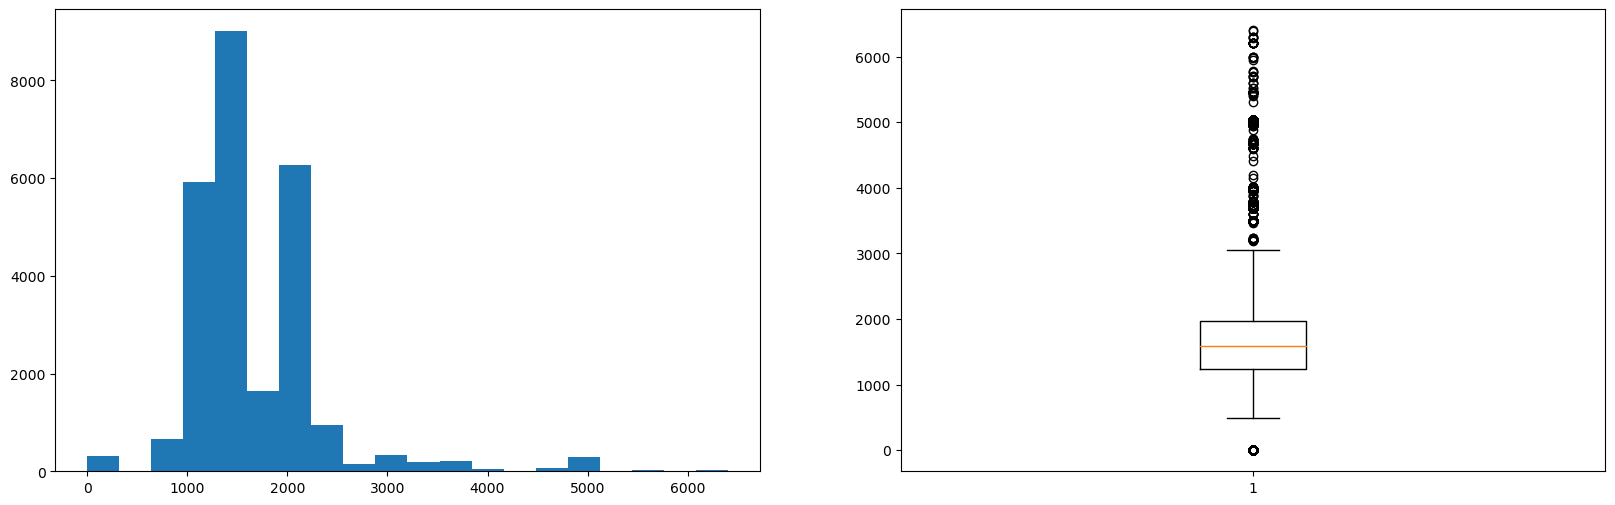

In [111]:
# After the modification above, let's check again how the observations in "engine_size" feature are distributed via Histogram and Boxplot

plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df["engine_size"], bins=20)

plt.subplot(122)
plt.boxplot(df["engine_size"])

plt.show()

In [ ]:
# len(df[df["fuel_type"] == "Electric"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type", "empty_weight", "co_emissions", "cons_avg"]]  )

In [112]:
# Let's find the average engine size

df["engine_size"].mean()

1658.130691173655

In [113]:
# Let's find the engine size at the middle

df["engine_size"].median()

1582.0

#### The examination of extreme values by means of z-score

In [114]:
# Print the number of rows before dropping outliers
print("Number of rows before dropping outliers:", len(df))

# Calculate the Modified z-scores for the feature
z_scores = np.abs((df["engine_size"] - df["engine_size"].median()) / df["engine_size"].std())

# Drop the rows with z-scores above the threshold
df = df[z_scores < 3]

# Drop the rows with z-scores above the threshold
df.reset_index(drop=True, inplace=True)

# Print the number of rows after dropping outliers
print("Number of rows after dropping outliers:", len(df))

# ?????????????????? We did NOT lose any car whose engine size is 1 and fuel type is Electric ??????????????

Number of rows before dropping outliers: 26115
Number of rows after dropping outliers: 25446


In [ ]:
# len(df[df["fuel_type"] == "Electric"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type", "empty_weight", "co_emissions", "cons_avg"]]  )

#### The distribution of engine sizes after modification by z-score

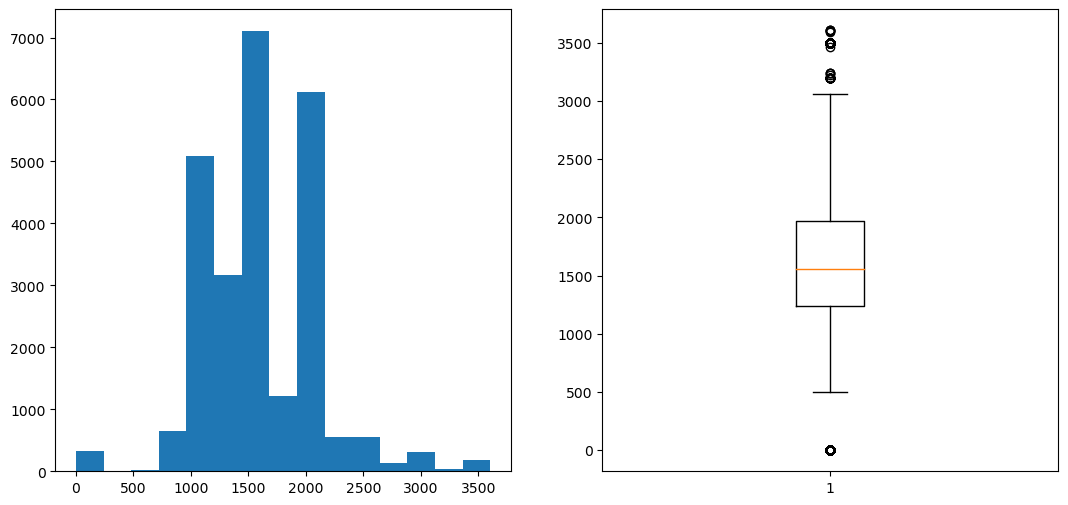

In [115]:
plt.figure(figsize=(20, 6))

plt.subplot(131)
plt.hist(df["engine_size"], bins=15)

plt.subplot(132)
plt.boxplot(df["engine_size"])

plt.show()

<Figure size 1600x600 with 0 Axes>

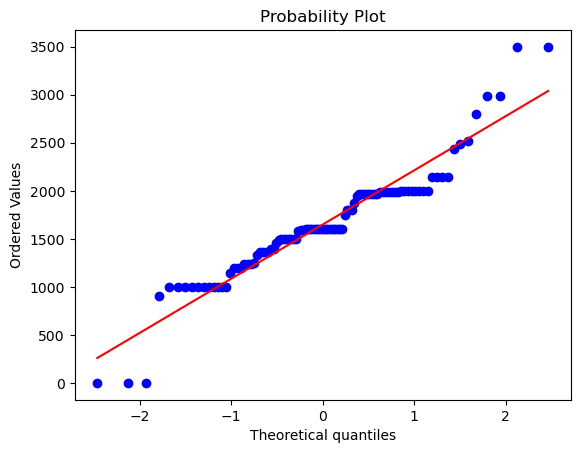

In [116]:
plt.figure(figsize=(16, 6))

# Sample 50 observations from the 'engine_size' column
my_data = df['engine_size'].sample(100)

# Calculate the mean and standard deviation of the sample
mu = np.mean(my_data)
sigma = np.std(my_data)

# Generate a normal distribution with the same mean and standard deviation as the sample
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = norm.pdf(x, mu, sigma)

# Plot the normal distribution as a dotted red line on the Q-Q plot
# plt.plot(x, y, 'r--', linewidth=2)

# Create the Q-Q plot
fig, ax = plt.subplots()
stats.probplot(my_data, dist="norm", plot=ax)

# Show the plot
plt.show()

In [117]:
# Let's check some basic information after dropping/modifying extreme values in "engine_size" feature

first_looking(df, "engine_size")

# 26115 - 25446 = 669 extreme values were dropped from the dataset

column name    :  engine_size
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  330
shape_of_df    :  (25446, 28)
--------------------------------
1598.0    2181
999.0     2143
1969.0    1602
1461.0    1107
1998.0     970
          ... 
2155.0       1
1280.0       1
1122.0       1
1891.0       1
2473.0       1
Name: engine_size, Length: 330, dtype: int64


## gears

In [118]:
# Let's explore basic information about "gears"

first_looking(df, "gears")

column name    :  gears
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  11
shape_of_df    :  (25446, 28)
--------------------------------
6.0     11424
5.0      7373
7.0      2292
8.0      2203
1.0      1191
9.0       584
4.0       290
3.0        35
10.0       29
0.0        24
2.0         1
Name: gears, dtype: int64


In [119]:
# Let's explore Descriptive Satatistics on "gears"

display(df.gears.describe())

# Differences between intervals
diff1 = df.gears.describe()['mean'] - df.gears.describe()['std']
diff2 = df.gears.describe()['25%'] - df.gears.describe()['min']
diff3 = df.gears.describe()['max'] - df.gears.describe()['75%']

print(f"The difference between the {color.BOLD + color.BLUE}mean value{color.BLUE + color.END} ({color.BOLD + color.GREEN}{df.price.describe()['mean']:.2f}){color.BLUE + color.END} and the {color.BOLD + color.BLUE}standard deviation{color.BLUE + color.END} ({color.BOLD + color.GREEN}{df.price.describe()['std']:.2f}{color.GREEN + color.END}) is {color.BOLD + color.RED}{diff1:.2f}{color.RED + color.END}.")
print(f"The difference between the {color.BOLD + color.BLUE}25th percentile{color.BLUE + color.END} ({color.BOLD + color.GREEN}{df.price.describe()['25%']:.2f}){color.BLUE + color.END} and the {color.BOLD + color.BLUE}minimum value{color.BLUE + color.END} ({color.BOLD + color.GREEN}{df.price.describe()['min']:.2f}{color.GREEN + color.END}) is {color.BOLD + color.RED}{diff2:.2f}{color.RED + color.END}.")
print(f"The difference between the {color.BOLD + color.BLUE}75th percentile{color.BLUE + color.END} ({color.BOLD + color.GREEN}{df.price.describe()['75%']:.2f}){color.BLUE + color.END} and the {color.BOLD + color.BLUE}maximum value{color.BLUE + color.END} ({color.BOLD + color.GREEN}{df.price.describe()['max']:.2f}{color.GREEN + color.END}) is {color.BOLD + color.RED}{diff3:.2f}{color.RED + color.END}.")

count    25446.000000
mean         5.780123
std          1.471506
min          0.000000
25%          5.000000
50%          6.000000
75%          6.000000
max         10.000000
Name: gears, dtype: float64

The difference between the mean value (19134.75) and the standard deviation (10463.75) is 4.31.
The difference between the 25th percentile (11900.00) and the minimum value (490.00) is 5.00.
The difference between the 75th percentile (25000.00) and the maximum value (51940.00) is 4.00.


#### The distribution of gears

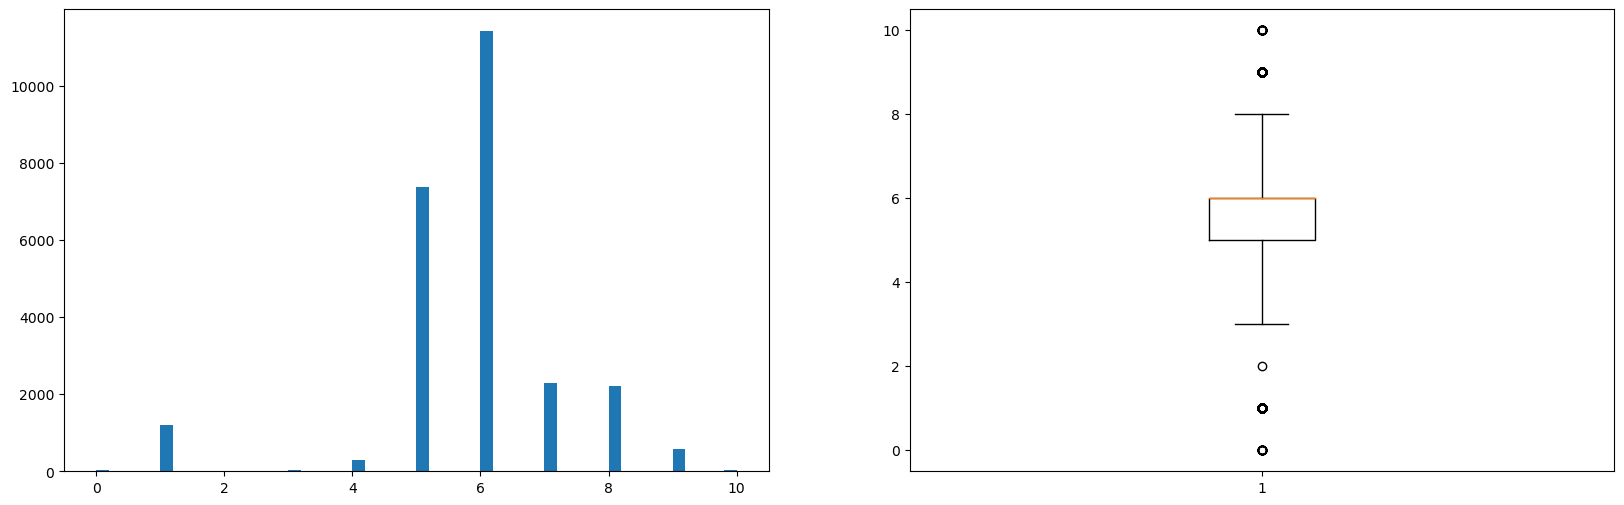

In [120]:
# Let's check how the observations in "gears" feature are distributed via Histogram and Boxplot

plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df.gears, bins=50)

plt.subplot(122)
plt.boxplot(df.gears, whis=2.5)  # boxplot based on 2.5 whisker

plt.show()

In [121]:
# Let's examine the first highest 20 observation in "gears" to see if there have been some extreme values away from others

df.sort_values(by=["gears"], ascending=False)["gears"].head(20)

19412    10.0
19337    10.0
19446    10.0
19377    10.0
19433    10.0
19342    10.0
19284    10.0
19441    10.0
19434    10.0
19438    10.0
19456    10.0
19440    10.0
19405    10.0
19587    10.0
19282    10.0
19439    10.0
19271    10.0
19407    10.0
19287    10.0
19729    10.0
Name: gears, dtype: float64

In [122]:
# Let's examine the first lowest 20 observation in "gears" to see if there have been some extreme values away from others

df.sort_values(by=["gears"], ascending=True)["gears"].head(20)

21394    0.0
19785    0.0
4083     0.0
17081    0.0
16400    0.0
25379    0.0
25378    0.0
16599    0.0
7886     0.0
17092    0.0
17089    0.0
17043    0.0
16386    0.0
17033    0.0
21212    0.0
5079     0.0
16552    0.0
717      0.0
11516    0.0
13763    0.0
Name: gears, dtype: float64

In [123]:
# Let's explore the vehicles having gears less than five (5) and greater than eight (8)

df[(df.gears < 5) | (df.gears > 8)][["make_model", "body_type", "gearbox", "fuel_type", "gears"]]

,make_model,body_type,gearbox,fuel_type,gears
7,Mercedes-Benz A 200,Compact,Automatic,Diesel,1.0
29,Mercedes-Benz E 220,Compact,Manual,Diesel,9.0
68,Mercedes-Benz V 220,Compact,Manual,Diesel,9.0
82,Mercedes-Benz E 300,Compact,Automatic,Liquid/Natural Gas,9.0
83,Mercedes-Benz A 180,Compact,Automatic,Diesel,1.0
...,...,...,...,...,...
25100,Volvo 240,Station Wagon,Manual,Liquid/Natural Gas,1.0
25288,Volvo S90,Sedan,Automatic,Benzine,4.0
25332,Volvo 240,Sedan,Automatic,Benzine,1.0
25378,Volvo S90,Sedan,Automatic,Diesel,0.0


**Let's focus on the engine size range of "Mercedes-Benz A 200"**

In [124]:
# define a function to highlight the highest, median, and minimum values in a column
def highlight_max_median_min(s):
    is_max = s == s.max()
    is_median = s == s.median()
    is_min = s == s.min()
    return ["background-color: pink" if v else "background-color: lightgreen" if w else "background-color: yellow" if x else "" for v, w, x in zip(is_max, is_median, is_min)]

# filter the DataFrame and apply the styling function
styled_df = df[(df.make_model == "Mercedes-Benz A 200")][["make_model", "body_type", "gearbox", "drivetrain", "gears", "fuel_type"]].style.apply(highlight_max_median_min, subset=["gears"])

# display the styled DataFrame
styled_df

,make_model,body_type,gearbox,drivetrain,gears,fuel_type
7,Mercedes-Benz A 200,Compact,Automatic,Front,1.000000,Diesel
21,Mercedes-Benz A 200,Compact,Manual,Front,6.000000,Benzine
25,Mercedes-Benz A 200,Compact,Automatic,Front,7.000000,Benzine
26,Mercedes-Benz A 200,Compact,Automatic,Front,7.000000,Benzine
46,Mercedes-Benz A 200,Compact,Manual,Front,6.000000,Diesel
47,Mercedes-Benz A 200,Compact,Automatic,Front,7.000000,Diesel
51,Mercedes-Benz A 200,Compact,Automatic,Front,7.000000,Benzine
56,Mercedes-Benz A 200,Compact,Automatic,4WD,8.000000,Diesel
59,Mercedes-Benz A 200,Compact,Automatic,Front,7.000000,Benzine
60,Mercedes-Benz A 200,Compact,Automatic,Front,7.000000,Diesel


### 📝 Domain Knowledge on Electric Vehicles:

**Do electric cars have gears?**

One of the most common questions regarding the latest in passenger-car technology is: Do electric cars have gears? The question really should be: Do electric vehicles have more than one gear, but, **in both cases** the broad answer is **``NO``**, they don’t. That’s in the case of production cars anyway, and the reason is simple: They don’t really need more than one gear.

**However**, if the vehicle is hybrit, it might have more than one gear.

**🧐 [SOURCE - Do electric cars have gears?](https://www.carsguide.com.au/car-advice/q-and-a/do-electric-cars-have-gears-84694)**

**As seen below, the majority of Electric Cars have a gear of 1:**

In [ ]:
# Let's explore the characteristics of vehicles whose fuel type is Electric

df[(df["fuel_type"] == "Electric")][["make_model", "body_type", "gearbox", "drivetrain", "gears"]]

**What About Classic ``Modern`` Vehicles?**

**Domain Knowledge on Electric Vehicles:**

**Is it possible that there have been ``MODERN cars`` with manual/automatic transmissions with 1, 2, 3, 4, 9, 50 gears?**

Most modern cars with manual transmissions have 5 or 6 forward gears. Most modern cars with automatic transmissions have 5–8 forward gears. A few have as many as 10 🧐 [Source](https://www.quora.com/What-are-maximum-number-of-transmission-gears).
Contemporary manual transmissions for cars typically use five or six forward gears ratios and one reverse gear, however, transmissions with between two and seven gears have been produced at times 🧐 [Source](https://en.wikipedia.org/wiki/Manual_transmission).

**Let's take a look at the gear numbers of other vehicles rather than electric vehicles in the dataset:**

In [125]:
# Let's explore gear characteristics of vehicles whose fuel type is Benzine OR Diesel OR Liquid/Natural Gas

df[((df["fuel_type"] == "Benzine")|(df["fuel_type"] == "Diesel")|(df["fuel_type"] == "Liquid/Natural Gas"))][["fuel_type", "gears", "make_model"]].value_counts()

fuel_type           gears  make_model         
Diesel              6.0    Volvo V40              562
Benzine             5.0    Dacia Sandero          501
                    6.0    Hyundai I30            458
                           Renault Megane         437
                    5.0    Volvo C70              377
                                                 ... 
                    7.0    Toyota Avensis           1
                    8.0    Ford Bronco              1
                           Ford Edge                1
                           Mercedes-Benz B 200      1
Liquid/Natural Gas  9.0    Mercedes-Benz E 300      1
Length: 1296, dtype: int64

<div style="background-color: #ffeeba; padding: 10px; font-size: 14px; font-weight: bold;">
    Domain Knowledge: Ford Mustang has 6 Speed Automatic Gear Box
</div>

In [126]:
# Let's focus on the characteristics of Ford Mustang whose fuel type is NOT Electric

df[(df.make_model == "Ford Mustang") & ~(df["fuel_type"] == "Electric")][["make_model", "body_type", "gearbox", "drivetrain", "gears", "fuel_type"]]

,make_model,body_type,gearbox,drivetrain,gears,fuel_type
19271,Ford Mustang,Convertible,Automatic,Rear,10.0,Benzine
19272,Ford Mustang,Convertible,Automatic,Rear,6.0,Benzine
19273,Ford Mustang,Convertible,Manual,Rear,6.0,Benzine
19274,Ford Mustang,Convertible,Manual,Rear,6.0,Benzine
19275,Ford Mustang,Convertible,Manual,Rear,6.0,Benzine
...,...,...,...,...,...,...
19449,Ford Mustang,Coupe,Manual,Rear,6.0,Benzine
19455,Ford Mustang,Coupe,Automatic,Rear,6.0,Benzine
19456,Ford Mustang,Coupe,Automatic,Rear,10.0,Benzine
19457,Ford Mustang,Coupe,Automatic,Rear,6.0,Benzine


In [127]:
# Let's assign the number of gears for ALL Ford Mustang whose fuel type is NOT Electric to six (6)

df.loc[((df.make_model == "Ford Mustang") & ~(df["fuel_type"] == "Electric")), "gears"] = 6
df.loc[((df.make_model == "Ford Mustang") & ~(df["fuel_type"] == "Electric")), "gears"]

19271    6.0
19272    6.0
19273    6.0
19274    6.0
19275    6.0
        ... 
19449    6.0
19455    6.0
19456    6.0
19457    6.0
19458    6.0
Name: gears, Length: 115, dtype: float64

<div style="background-color: #ffeeba; padding: 10px; font-size: 14px; font-weight: bold;">
    Unlike Ford Mustang, the Japanese market C-HR is powered by either <code>1.2-litre turbocharged petrol engine</code>, OR <code>1.8-litre Hybrid</code>. The FWD models are available with both engines, while the only motor for the AWD models is 1.2-litre turbo.

So, we will <u>keep the values</u> of <code>gears</code> for it.
</div>

In [128]:
df[(df.make_model == "Toyota C-HR") & ~(df["fuel_type"] == "Electric")][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "fuel_type"]]

,make_model,age,body_type,gearbox,drivetrain,gears,fuel_type


<div style="background-color: lightgreen; padding: 10px; font-size: 14px; font-weight: bold;">
    <b><u>Conclusion:</u></b>

Due to the confusion and unstandardized situations in the concepts of the automotive sector mentioned above, <code>more than 8-gear for traditional vehicles</code> or <code>vehicles having 0-Gear for electric ones</code> will be EITHER deducted from the dataset OR imputed consistent with <code>"make_model"</code>` & <code>"body_type"</code> features, assuming that they do NOT reflect reality.
</div>

In [129]:
# Let's explore gear characteristics of vehicles having greater than eight (8) according to our Domain Knowledge above

df[df.gears > 8][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "fuel_type"]]

,make_model,age,body_type,gearbox,drivetrain,gears,fuel_type
29,Mercedes-Benz E 220,6.0,Compact,Manual,Rear,9.0,Diesel
68,Mercedes-Benz V 220,6.0,Compact,Manual,Front,9.0,Diesel
82,Mercedes-Benz E 300,36.0,Compact,Automatic,Rear,9.0,Liquid/Natural Gas
258,Mercedes-Benz E 220,5.0,Compact,Automatic,Rear,9.0,Diesel
349,Mercedes-Benz Slc 43 Amg,6.0,Convertible,Automatic,Rear,9.0,Benzine
...,...,...,...,...,...,...,...
9835,Fiat 500X,6.0,Station Wagon,Automatic,4WD,9.0,Diesel
10348,Fiat 500X,6.0,Sedan,Automatic,4WD,9.0,Diesel
19463,Ford Explorer,1.0,Off-Road/Pick-Up,Automatic,4WD,10.0,Benzine
19587,Ford Ranger,2.0,Off-Road/Pick-Up,Automatic,4WD,10.0,Diesel


In [130]:
# Let's explore characteristics of vehicles whose gear number equals to zero(0) 

df[df.gears == 0][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "fuel_type"]]

,make_model,age,body_type,gearbox,drivetrain,gears,fuel_type
717,Mercedes-Benz E 300,3.0,Coupe,Automatic,Rear,0.0,Diesel
4083,Renault Zoe,3.0,Compact,Automatic,Front,0.0,Electric
5079,Renault Kadjar,2.0,Off-Road/Pick-Up,Automatic,Front,0.0,Benzine
7886,Peugeot Partner,4.0,Station Wagon,Manual,Front,0.0,Electric
8534,Fiat 500,1.0,Compact,Automatic,Front,0.0,Benzine
11516,Seat Tarraco,3.0,Off-Road/Pick-Up,Automatic,4WD,0.0,Diesel
13763,Skoda Octavia,0.0,Sedan,Automatic,Front,0.0,Benzine
16386,Toyota C-Hr,4.0,Off-Road/Pick-Up,Automatic,Front,0.0,Benzine
16400,Toyota C-Hr,1.0,Off-Road/Pick-Up,Automatic,Front,0.0,Benzine
16552,Toyota Corolla,3.0,Station Wagon,Automatic,Front,0.0,Benzine


In [131]:
# Let's explore characteristics of vehicles whose gear numbers are more than one (1) and less than five (5)

df[(df.gears > 1) & (df.gears < 5)][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "fuel_type"]]

,make_model,age,body_type,gearbox,drivetrain,gears,fuel_type
328,Mercedes-Benz 220,13.0,Compact,Manual,Rear,4.0,Diesel
424,Mercedes-Benz Sl 300,35.0,Convertible,Automatic,Rear,4.0,Benzine
440,Mercedes-Benz Sl 280,43.0,Convertible,Automatic,Rear,4.0,Benzine
462,Mercedes-Benz Sl 280,27.0,Convertible,Automatic,Rear,4.0,Benzine
493,Mercedes-Benz 220,3.0,Convertible,Automatic,Rear,4.0,Diesel
...,...,...,...,...,...,...,...
23945,Volvo 240,42.0,Coupe,Manual,Rear,4.0,Benzine
23948,Volvo C70,24.0,Coupe,Automatic,Front,4.0,Benzine
23977,Volvo 262,45.0,Coupe,Manual,Rear,4.0,Benzine
23986,Volvo 480,31.0,Coupe,Automatic,Front,4.0,Benzine


### 📝 Domain Knowledge on Some Old Vehicles:

- **1961 Mercury Comet** with a V6 101 HP engine and a **2-speed automatic transmission**.<br>
- **1957 Ford Thunderbird has 3-speed Fordomatic automatic 3-speed manual 3-speed overdrive manual transmission**.<br>
- All **automatic Nissan Stageas** were **4 speed**.<br>
- The **300ZX** offers you three types of transmissions to choose from-5-speed manual with the VG30ET and 5-speed manual or **4-speed automatic** with the VG30E.<br>
- The **Nissan Figaro** is equipped with a turbocharged, 4 cylinder, fuel injected MA10ET engine mated to a **3-speed automatic gearbox**.<br>

And so on.

In [132]:
# Let's assign gear numbers having zero (o) OR being greater than eight (8) to NaN

# df['gears'] = np.where(df.gears > 8, np.nan, df.gears)

df.loc[((df.gears == 0) | (df.gears > 8)), 'gears'] = np.nan

In [133]:
# Let's check how many NaNs there have been in "gears" feaature

df.gears.isnull().sum()

609

In [134]:
# This DEF will fill the missing values in the "gears" with the mode value based on "make_model" and "body_type"

fill(df, "make_model", "body_type", "gears", "mode")

COLUMN NAME    :  gears
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  8
--------------------------------
1.0     1197
2.0        1
3.0       34
4.0      290
5.0     7395
6.0    11761
7.0     2552
8.0     2216
Name: gears, dtype: int64


In [135]:
# Let's explore how many vehicles have two (2) gears

df[df.gears==2]

,make_model,make,model,location,price,body_type,type,warranty,mileage,gearbox,...,full_service_history,upholstery,previous_owner,energy_efficiency_class,age,power_kW,cons_avg,comfort_&_convenience_Package,entertainment_&_media_Package,safety_&_security_Package
8283,Fiat 500,Fiat,500,"Dreiangelweg 3, 92318 Neumarkt, DE",10950.0,Compact,Used,No,13500.0,Manual,...,Yes,Cloth,2.0,unefficient,11.0,17.0,4.15,Standard,Standard Media,Safety Standard Package


In [136]:
# Let's assign the index of vehicle haaving two (2) gears to an object

drop_index = df[df.gears==2].index
drop_index

Int64Index([8283], dtype='int64')

In [137]:
# Let's drop the vehicle/s having two (2) gears from the DataFrame

print(df.shape)
df.drop(drop_index, axis=0, inplace=True)
print(df.shape)

(25446, 28)
(25445, 28)


<a href="https://clarusway.com/contact-us/"><img align="center" src="https://i.ibb.co/B43qn24/officially-licensed-logo.png" alt="Open in Clarusway LMS" width="110" height="200" title="This notebook is licensed by Clarusway IT training school. Please contact the authorized persons about the conditions under which you can use or share."></a>